# 💊 COVID-19 pandemic statistics 💊

## I. 📌Introduction

This project presents a comprehensive data-driven analysis of the COVID-19 pandemic using data sourced from the World Health Organization (WHO) and other publicly available datasets. Covering the critical period from January to August 2020, the analysis aims to shed light on the early transmission dynamics, response measures, and recovery patterns across different regions of the world.

The survey spans from January to July 2020, examining data across **187 countries** grouped by **WHO regional classifications**, including: *Eastern Mediterranean, Europe, Africa, Americas, Western Pacific,* and *South-East Asia*. The analysis focuses on key metrics such as confirmed cases, mortality rates, recovery trends, and testing efforts.

Through Python programming and data visualization tools like Matplotlib and Seaborn, this personal project seeks to deepen understanding of the pandemic’s behavior over time and geographic distribution. It serves both as a learning exercise and a practical demonstration of data analysis and storytelling through visualization — contributing to the broader conversation about global health and policy response during a crisis.

📎 **Source dataset**: [Stats NZ - Large Datasets CSV Download](https://www.stats.govt.nz/large-datasets/csv-files-for-download/)


## II. 📊 Useful Insights from COVID-19 Data

1. 🕒 **Time-Based Trends**

-   Line charts showing confirmed cases, deaths, and recoveries over time (daily or monthly).

-   Identify outbreak peaks and major turning points.

2. 🌍 **Country Comparisons**

-   Analyze which countries have highest mortality rates relative to infections.

-   Compare recovery effectiveness across regions or countries.

3. ⚖️ **Mortality and Recovery Rates**

-   Compute:

    -   **Mortality rate** = `Deaths / Confirmed`

    -   **Recovery rate** = `Recovered / Confirmed`

-   Observe trends over time or between countries/regions.

4. 📅 **Segment by Time Periods**

-   Group data by quarter, year, or health policy phases (e.g. lockdowns, vaccination periods).

-   Analyze impact of timing on epidemic control.

5. 📈 **Growth Analysis**

-   Measure case growth over days/weeks.

-   Track percentage change compared to previous period to assess trend direction.

| Column             | Description                                                                                                |
| ------------------ | ---------------------------------------------------------------------------------------------------------- |
| **Date**           | The reporting date (formatted as mm/dd/yyyy)                                                               |
| **Country/Region** | Name of the country or territory reporting the data                                                        |
| **Confirmed**      | Cumulative number of **confirmed COVID-19 cases** up to that date                                          |
| **Deaths**         | Cumulative number of **COVID-19 related deaths** up to that date                                           |
| **Recovered**      | Cumulative number of **recovered cases** reported up to that date                                          |
| **Active**         | Number of **currently active cases** at that time (typically calculated as Confirmed − Deaths − Recovered) |
| **New cases**      | Number of **newly confirmed cases** on that specific day                                                   |
| **New deaths**     | Number of **new deaths** reported on that specific day                                                     |
| **New recovered**  | Number of **new recoveries** reported on that specific day                                                 |
| **WHO Region**     | **WHO-designated region** (e.g., Europe, Africa, Americas, etc.)                                           |
| **iso\_alpha**     | ISO Alpha-3 **country code** (three-letter abbreviation, e.g., `VNM` for Vietnam, `USA` for the USA)       |


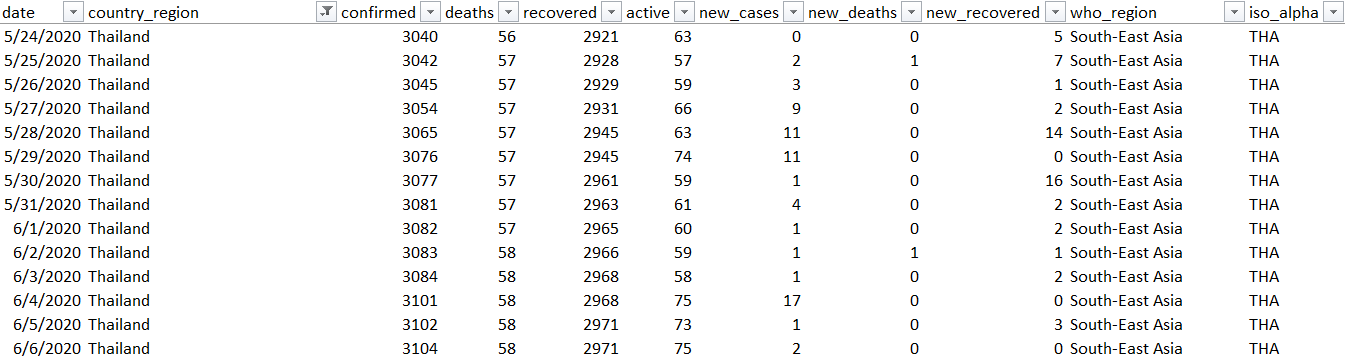

## III. Data cleaning
### 📚 Import libraries

In [162]:
# your code here
# Import necessary libraries
import pandas as pd                # Handle tabular data
import numpy as np                # Handle missing values, NaN, and mathematical operations
import dateparser                 # Parse date/time from natural language strings
from datetime import datetime     # Work with date and time objects
from collections import Counter   # Count errors or anomalies in data
import math                       # Mathematical functions
import matplotlib.pyplot as plt   # Plotting library
import seaborn as sns             # Visualization with advanced plots
import matplotlib.ticker as ticker

In [163]:
# your code here

df = pd.read_csv("https://raw.githubusercontent.com/DuyLinh-Data/DA_self_learning/main/Stats_covid19/data/covid_grouped.csv")

#df = pd.read_csv(r"data_selflearning\covid_grouped.csv")
df.sample(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region,iso_alpha
17598,2020-04-25,Bolivia,866,46,54,766,59,2,0,Americas,BOL
35063,2020-07-27,Laos,20,0,19,1,0,0,0,Western Pacific,
34789,2020-07-26,Armenia,37317,705,26478,10134,321,5,235,Europe,ARM
34010,2020-07-21,Syria,540,31,0,509,18,2,0,Eastern Mediterranean,SYR
31350,2020-07-07,New Zealand,1537,22,1492,23,1,0,0,Western Pacific,NZL


In [164]:
# Convert column headers to lowercase

import pandas as pd
import re

df.columns = [re.sub(r'\W+', '_', col.lower().strip()) for col in df.columns]


In [165]:
df.sample(5)        # Check dataframe

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,iso_alpha
18173,2020-04-28,Chad,52,2,19,31,6,2,4,Africa,TCD
4044,2020-02-12,Mozambique,0,0,0,0,0,0,0,Africa,MOZ
25207,2020-06-04,Sierra Leone,914,47,491,376,5,0,0,Africa,SLE
30232,2020-07-01,North Macedonia,6454,306,2598,3550,120,4,123,Europe,MKD
31296,2020-07-07,Greece,3589,193,1374,2022,27,1,0,Europe,GRC


### 🎲📲🎰 Generate statistical summaries for the dataframe

In [166]:
df.shape

(35156, 11)

In [167]:
# List column names in dataframe
df.columns

Index(['date', 'country_region', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'who_region', 'iso_alpha'],
      dtype='object')

In [168]:
# Statistics (for numeric format only)
df.describe()

,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [169]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            35156 non-null  object
 1   country_region  35156 non-null  object
 2   confirmed       35156 non-null  int64 
 3   deaths          35156 non-null  int64 
 4   recovered       35156 non-null  int64 
 5   active          35156 non-null  int64 
 6   new_cases       35156 non-null  int64 
 7   new_deaths      35156 non-null  int64 
 8   new_recovered   35156 non-null  int64 
 9   who_region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


### 🦉🔍🦉 Cleaning data

In [170]:
# Count empty values in columns
df.isna().sum()

date              0
country_region    0
confirmed         0
deaths            0
recovered         0
active            0
new_cases         0
new_deaths        0
new_recovered     0
who_region        0
iso_alpha         0
dtype: int64

In [171]:
# Show columns index

for i, col in enumerate(df.columns):
    print(i, col)

0 date
1 country_region
2 confirmed
3 deaths
4 recovered
5 active
6 new_cases
7 new_deaths
8 new_recovered
9 who_region
10 iso_alpha


In [172]:
# Count the number of fully duplicated rows
num_duplicates = df.duplicated().sum()
print(f"The number of fully duplicated rows: {num_duplicates}")

The number of fully duplicated rows: 0


In [173]:
# Check datatype
print(df['date'].dtypes)  

object


In [174]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

In [175]:
# Check datatype
print(df['date'].dtypes)  

datetime64[ns]


In [176]:
# Check non-integer

import pandas as pd
columns_to_check = ['confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered']

# Count the number of non-integer values in each column
non_int_counts = {}
for col in columns_to_check:
    non_int_counts[col] = df[col].apply(lambda x: not isinstance(x, int)).sum()

# Result
for col, count in non_int_counts.items():
    print(f"non-integer values || {col}: {count}")


non-integer values || confirmed: 0
non-integer values || deaths: 0
non-integer values || recovered: 0
non-integer values || active: 0
non-integer values || new_cases: 0
non-integer values || new_deaths: 0
non-integer values || new_recovered: 0


In [177]:
# 🔍 Check for values < 0
# Columns to check for negative values
columns_to_check = ['confirmed', 'deaths', 'recovered', 'active', 'new_cases', 'new_deaths', 'new_recovered']

# Count the number of negative values in each column
negative_counts = df[columns_to_check].apply(lambda x: (x < 0).sum())

# Display the result
print("🔍 Number of negative values in each column:")
print(negative_counts)


🔍 Number of negative values in each column:
confirmed         0
deaths            0
recovered         0
active            2
new_cases         0
new_deaths       38
new_recovered    77
dtype: int64


In [178]:
df.shape

(35156, 11)

💣⛔⛔💣 Remove columns with invalid values (active, new_deaths, new_recovered)

In [179]:
import pandas as pd

# Ensure the 'active' column is numeric (if needed)
df['active'] = pd.to_numeric(df['active'], errors='coerce')

# Remove rows with negative values in the 'active' column
df = df[df['active'] >= 0]


In [180]:
import pandas as pd

# df = original_df.copy()

# Ensure the 'new_deaths' column is numeric
df.loc[:, 'new_deaths'] = pd.to_numeric(df['new_deaths'], errors='coerce')

# Remove rows with negative values in the 'new_deaths' column
df = df[df['new_deaths'] >= 0]


In [181]:
import pandas as pd

# df = original_df.copy()

# Ensure the 'new_recovered' column is numeric
df.loc[:, 'new_recovered'] = pd.to_numeric(df['new_recovered'], errors='coerce')

# Remove rows with negative values in the 'new_recovered' column
df = df[df['new_recovered'] >= 0]

In [182]:
df.shape

(35041, 11)

In [183]:
import pandas as pd

# List of columns to check for datetime validity
columns_to_check = ['date']  # Replace 'date' with the actual column name(s) you want to check

# Function to count invalid datetime values in a column
def count_invalid_datetime(series):
    non_blank = series.dropna().astype(str).str.strip()          # Remove NaNs and whitespace
    non_blank = non_blank[non_blank != '']                       # Exclude empty strings
    invalid_count = pd.to_datetime(non_blank, errors='coerce').isna().sum()
    return invalid_count

# Check each column and print results
for col in columns_to_check:
    invalid = count_invalid_datetime(df[col])
    print(f"Number of values in column '{col}' that are not valid datetime format: {invalid}")



Number of values in column 'date' that are not valid datetime format: 0


In [184]:
# Show dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35041 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            35041 non-null  datetime64[ns]
 1   country_region  35041 non-null  object        
 2   confirmed       35041 non-null  int64         
 3   deaths          35041 non-null  int64         
 4   recovered       35041 non-null  int64         
 5   active          35041 non-null  int64         
 6   new_cases       35041 non-null  int64         
 7   new_deaths      35041 non-null  int64         
 8   new_recovered   35041 non-null  int64         
 9   who_region      35041 non-null  object        
 10  iso_alpha       35041 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 3.2+ MB


️🏆 So, There are no empty cells, no duplicate entries, and all columns are in the correct format!!!

In [185]:
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Split into day, month, year and month-year
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.to_period('M').astype(str)  # example: '2020-04'


In [186]:
df['month_year'].unique()

array(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07'], dtype=object)

In [187]:
df['who_region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [188]:
num_region = df['who_region'].nunique()
print(f"Region for stats: {num_region}")

Region for stats: 6


In [189]:
num_country_region = df['country_region'].nunique()
print(f"Country for stats: {num_country_region}")

Country for stats: 187


In [190]:
df.sample(5)

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,iso_alpha,day,month,year,month_year
5838,2020-02-22,Costa Rica,0,0,0,0,0,0,0,Americas,CRI,22,2,2020,2020-02
11363,2020-03-22,San Marino,175,20,4,151,31,0,0,Europe,SMR,22,3,2020,2020-03
23448,2020-05-26,Guyana,139,11,62,66,2,0,0,Americas,GUY,26,5,2020,2020-05
34711,2020-07-25,Morocco,19645,305,16282,3058,811,6,182,Eastern Mediterranean,MAR,25,7,2020,2020-07
10172,2020-03-16,Haiti,0,0,0,0,0,0,0,Americas,HTI,16,3,2020,2020-03


Check if numerical columns follow expected rules:

**Active:** Number of currently active cases at the given time
`(typically calculated as = Confirmed − Deaths − Recovered)`

In [191]:
import pandas as pd

# Step 1: Create a new calculated column
df["calculated_active"] = df["confirmed"] - df["deaths"] - df["recovered"]

# Step 2: Compare the actual 'active' column with the calculated one
df["active_match"] = df["active"] == df["calculated_active"]

# Step 3: Filter rows where the values do not match
invalid_active_rows = df[df["active_match"] == False]

# Step 4: Export the mismatched rows to CSV
invalid_active_rows.to_csv("invalid_active_rows.csv", index=False)

# Optional: Print how many mismatches found
print(f"Total mismatched rows: {len(invalid_active_rows)}")

Total mismatched rows: 0


In [192]:
# Export file csv
df.to_csv('cleaned_covid_grouped.csv', index=False, encoding='utf-8-sig')

## 🛠 Exploratory Data Analysis (EDA)

Line chart showing the number of confirmed cases, deaths, and recoveries over time (by day or month).<br>
Identify outbreak points or peak periods of the pandemic.

### 1. 💡 Trend Over Time

In [193]:
df.sample(3)

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,iso_alpha,day,month,year,month_year,calculated_active,active_match
33265,2020-07-17,Tanzania,509,21,183,305,0,0,0,Africa,TZA,17,7,2020,2020-07,305,True
27831,2020-06-18,South Korea,12306,280,10835,1191,49,0,35,Western Pacific,,18,6,2020,2020-06,1191,True
16951,2020-04-21,New Zealand,1445,13,1006,426,5,1,32,Western Pacific,NZL,21,4,2020,2020-04,426,True


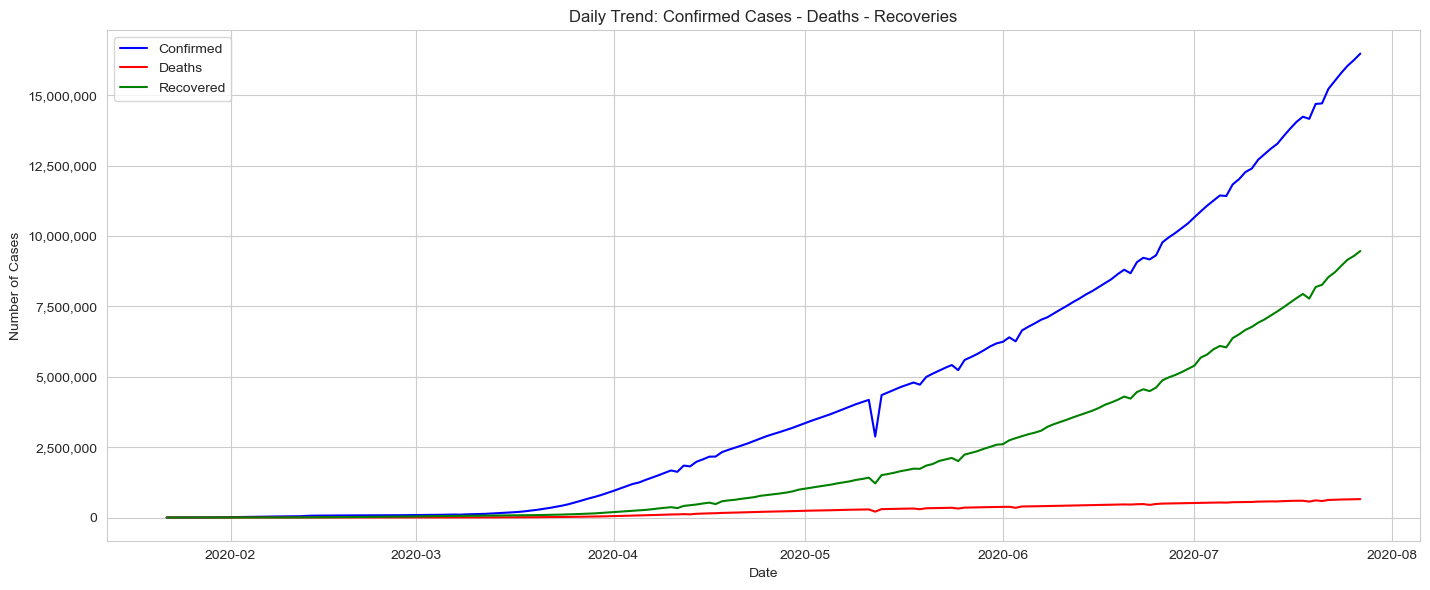

In [194]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group data by day (if needed)
daily_df = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum()

# Plot line chart by day
plt.figure(figsize=(14, 6))
plt.plot(daily_df.index, daily_df['confirmed'], label='Confirmed', color='blue')
plt.plot(daily_df.index, daily_df['deaths'], label='Deaths', color='red')
plt.plot(daily_df.index, daily_df['recovered'], label='Recovered', color='green')
plt.title('Daily Trend: Confirmed Cases - Deaths - Recoveries')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Turn off scientific notation on the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

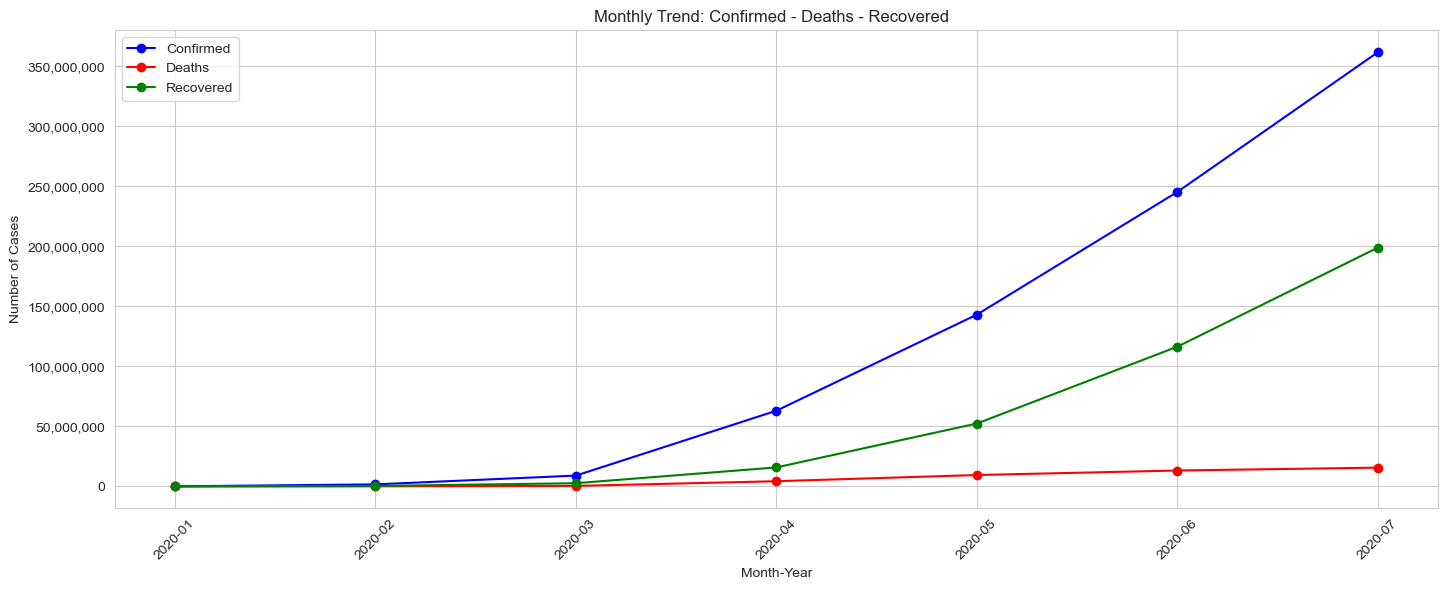

In [195]:
import matplotlib.ticker as ticker
# Group data by month and year
monthly_df = df.groupby('month_year')[['confirmed', 'deaths', 'recovered']].sum()

#monthly_df.index = monthly_df.index.to_timestamp()

# Plot line chart by month and year
plt.figure(figsize=(14, 6))
plt.plot(monthly_df.index, monthly_df['confirmed'], label='Confirmed', color='blue', marker='o')
plt.plot(monthly_df.index, monthly_df['deaths'], label='Deaths', color='red', marker='o')
plt.plot(monthly_df.index, monthly_df['recovered'], label='Recovered', color='green', marker='o')
plt.title('Monthly Trend: Confirmed - Deaths - Recovered  ')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Turn off scientific notation on the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


In [196]:
peak_confirmed = daily_df['confirmed'].idxmax()
peak_deaths = daily_df['deaths'].idxmax()
peak_recovered = daily_df['recovered'].idxmax()

print(f"🔥 Peak of Confirmed Cases: {peak_confirmed}")
print(f"⚰️ Peak of Deaths: {peak_deaths}")
print(f"💪 Peak of Recoveries: {peak_recovered}")


🔥 Peak of Confirmed Cases: 2020-07-27 00:00:00
⚰️ Peak of Deaths: 2020-07-27 00:00:00
💪 Peak of Recoveries: 2020-07-27 00:00:00


-   Before March 2020, due to the lack of effective treatment methods, the number of recoveries was very low; at that time, the number of infections was also minimal and not yet significant.

-   From March 2020 onwards, thanks to improvements in healthcare, the number of recoveries increased significantly, while the number of deaths also rose slightly each day.

Other way

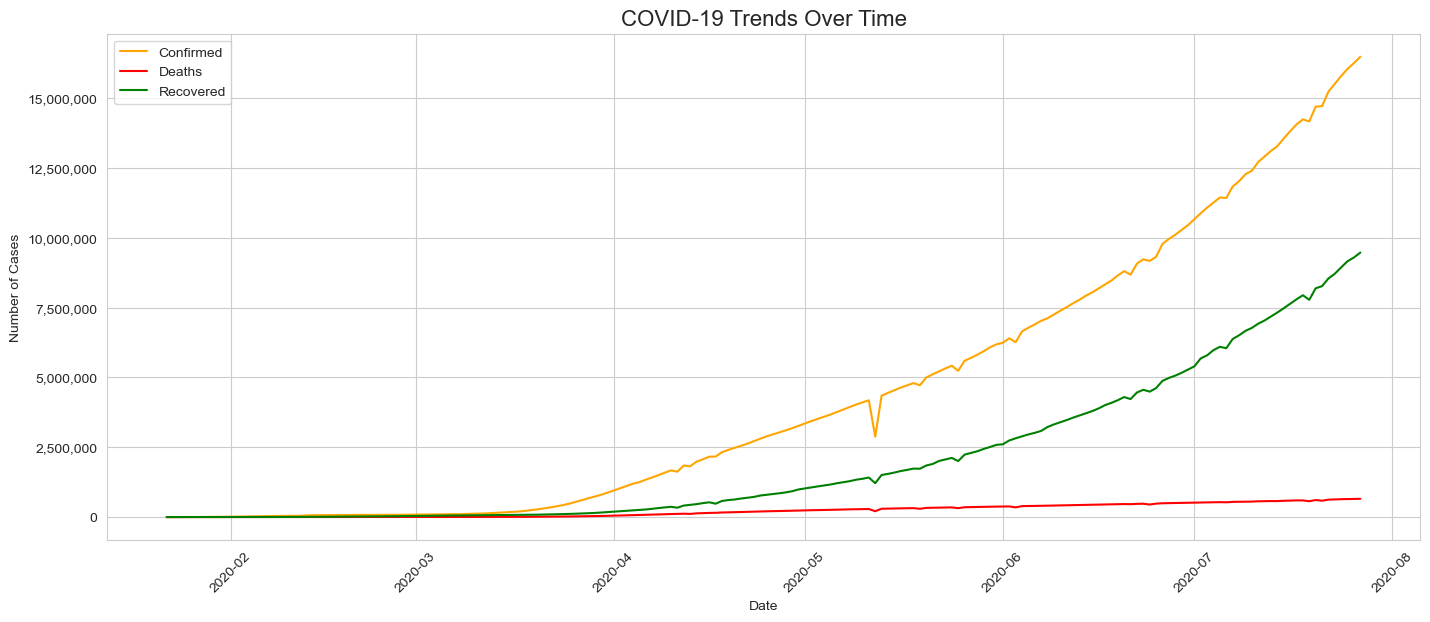

📈 Peak Confirmed: 2020-07-27 with 16480485 cases
💀 Peak Deaths: 2020-07-27 with 654036 deaths
💚 Peak Recovered: 2020-07-27 with 9468087 recoveries


In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group data by date if there are multiple records per day
daily_df = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Plot line chart
plt.figure(figsize=(14, 6))
plt.plot(daily_df['date'], daily_df['confirmed'], label='Confirmed', color='orange')
plt.plot(daily_df['date'], daily_df['deaths'], label='Deaths', color='red')
plt.plot(daily_df['date'], daily_df['recovered'], label='Recovered', color='green')

plt.title('COVID-19 Trends Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

# Turn off scientific notation on the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

# 🧠 The day of peak
peak_confirmed = daily_df.loc[daily_df['confirmed'].idxmax()]
peak_deaths = daily_df.loc[daily_df['deaths'].idxmax()]
peak_recovered = daily_df.loc[daily_df['recovered'].idxmax()]

print("📈 Peak Confirmed:", peak_confirmed['date'].date(), "with", peak_confirmed['confirmed'], "cases")
print("💀 Peak Deaths:", peak_deaths['date'].date(), "with", peak_deaths['deaths'], "deaths")
print("💚 Peak Recovered:", peak_recovered['date'].date(), "with", peak_recovered['recovered'], "recoveries")


Another way: combine charts to display in the same table

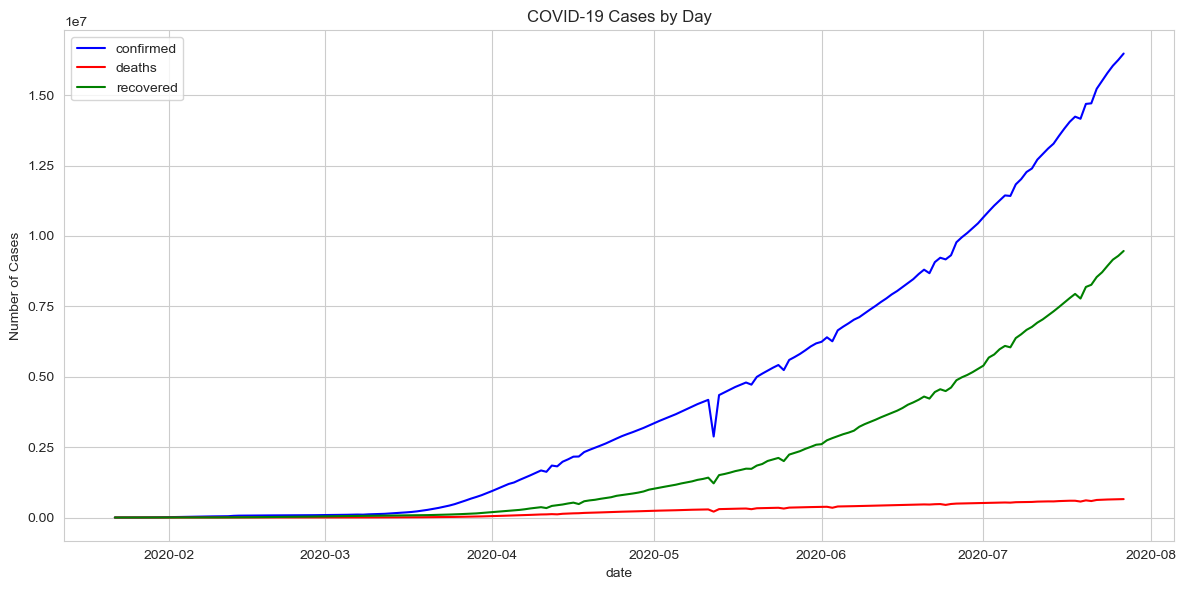

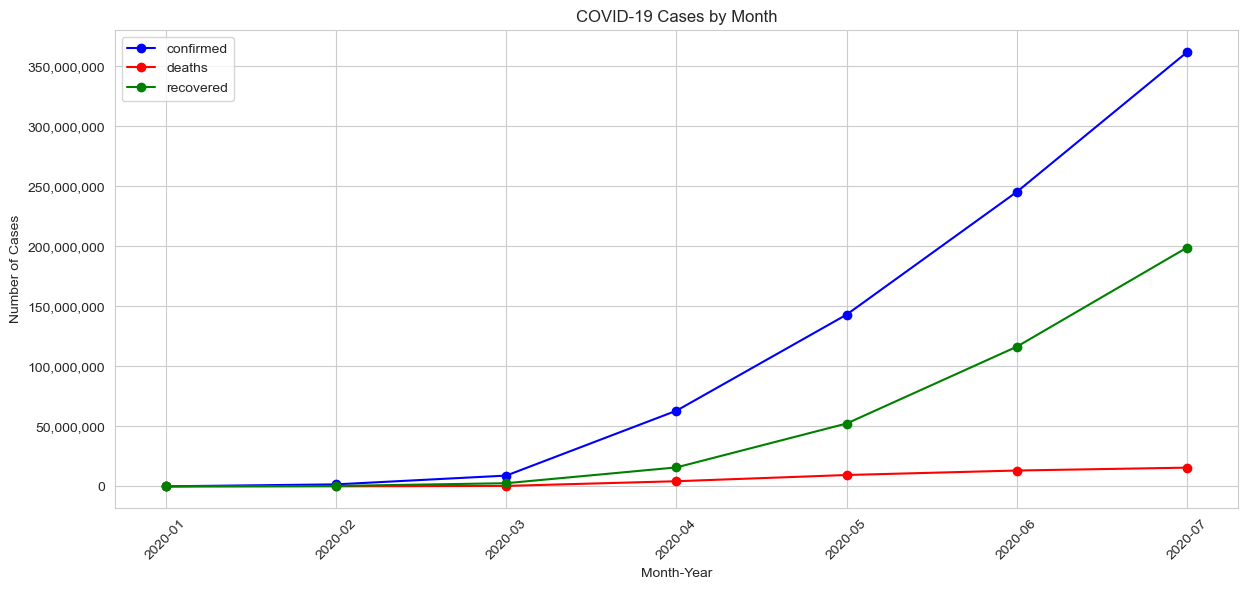

📈 Peak Confirmed: 2020-07-27 with 16480485 cases
💀 Peak Deaths: 2020-07-27 with 654036 deaths
💚 Peak Recovered: 2020-07-27 with 9468087 recoveries


In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# --- Chart 1: Daily statistics ---
df_daily = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_daily['date'], df_daily['confirmed'], label='confirmed', color='blue')
plt.plot(df_daily['date'], df_daily['deaths'], label='deaths', color='red')
plt.plot(df_daily['date'], df_daily['recovered'], label='recovered', color='green')
plt.title('COVID-19 Cases by Day')
plt.xlabel('date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Chart 2: Monthly-Yearly statistics ---
df['month_year'] = df['date'].dt.to_period('M')
df_monthly = df.groupby('month_year')[['confirmed', 'deaths', 'recovered']].sum().reset_index()
df_monthly['month_year'] = df_monthly['month_year'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(df_monthly['month_year'], df_monthly['confirmed'], label='confirmed', color='blue', marker='o')
plt.plot(df_monthly['month_year'], df_monthly['deaths'], label='deaths', color='red', marker='o')
plt.plot(df_monthly['month_year'], df_monthly['recovered'], label='recovered', color='green', marker='o')
plt.title('COVID-19 Cases by Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Turn off scientific notation on the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

# 🧠 Identify the peak day
peak_confirmed = daily_df.loc[daily_df['confirmed'].idxmax()]
peak_deaths = daily_df.loc[daily_df['deaths'].idxmax()]
peak_recovered = daily_df.loc[daily_df['recovered'].idxmax()]

print("📈 Peak Confirmed:", peak_confirmed['date'].date(), "with", peak_confirmed['confirmed'], "cases")
print("💀 Peak Deaths:", peak_deaths['date'].date(), "with", peak_deaths['deaths'], "deaths")
print("💚 Peak Recovered:", peak_recovered['date'].date(), "with", peak_recovered['recovered'], "recoveries")

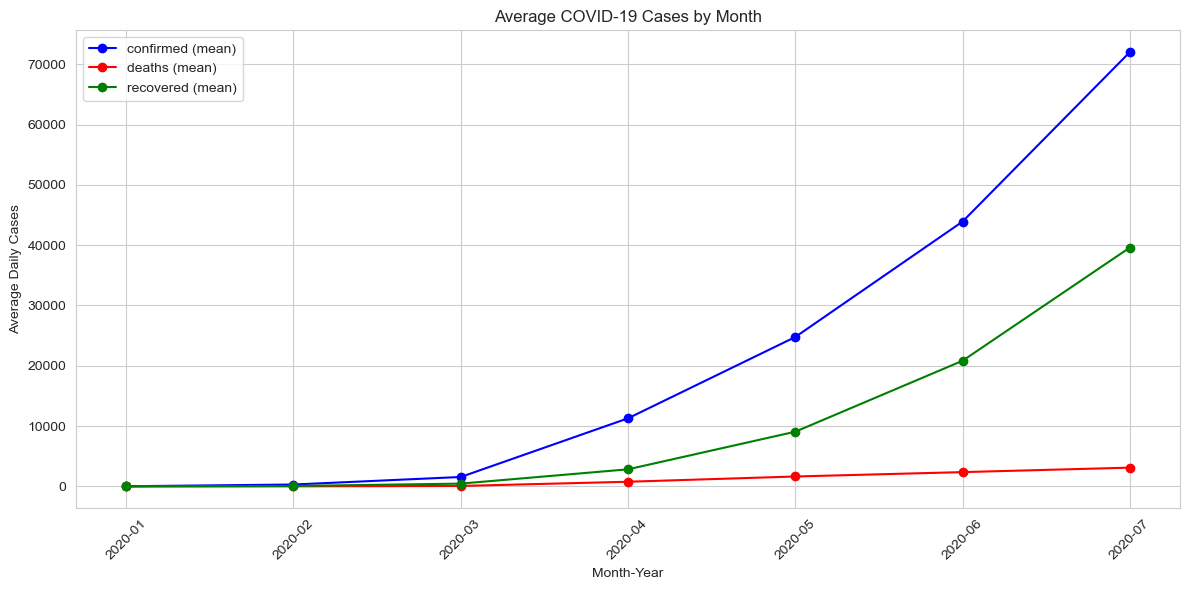

In [199]:
# --- Calculate monthly-yearly averages ---
df['month_year'] = df['date'].dt.to_period('M')
df_monthly_avg = df.groupby('month_year')[['confirmed', 'deaths', 'recovered']].mean().reset_index()
df_monthly_avg['month_year'] = df_monthly_avg['month_year'].astype(str)

# --- Plot average chart ---
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_avg['month_year'], df_monthly_avg['confirmed'], label='confirmed (mean)', color='blue', marker='o')
plt.plot(df_monthly_avg['month_year'], df_monthly_avg['deaths'], label='deaths (mean)', color='red', marker='o')
plt.plot(df_monthly_avg['month_year'], df_monthly_avg['recovered'], label='recovered (mean)', color='green', marker='o')
plt.title('Average COVID-19 Cases by Month')
plt.xlabel('Month-Year')
plt.ylabel('Average Daily Cases')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 2. Comparison Between Countries

**The following Python code uses Pandas and Matplotlib/Seaborn to:**

-   Calculate the total number of confirmed, death, and recovered cases by country

-   Compute the death rate and recovery rate

-   Identify the country with the highest death rate and highest recovery rate

-   Visualize this data using bar charts

#### 🌍 The analysis below applies globally.

In [200]:
import pandas as pd

# Assume df is a DataFrame containing COVID-19 data with the following columns:
# 'country', 'confirmed', 'deaths', 'recovered'

# Step 1: Calculate total confirmed, deaths, and recovered cases by country
country_stats = df.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Step 2: Compute death rate and recovery rate
country_stats['death_rate'] = country_stats['deaths'] / country_stats['confirmed']
country_stats['recovery_rate'] = country_stats['recovered'] / country_stats['confirmed']

# Step 3: Find the country with the highest death rate
highest_death_rate = country_stats.sort_values(by='death_rate', ascending=False).head(1)

# Step 4: Find the country with the highest recovery rate
highest_recovery_rate = country_stats.sort_values(by='recovery_rate', ascending=False).head(1)

# Display the results
print("Country with the highest death rate:")
print(highest_death_rate[['country_region', 'death_rate']])

print("=========================================")

print("\nCountry with the highest recovery rate:")
print(highest_recovery_rate[['country_region', 'recovery_rate']])


Country with the highest death rate:
    country_region  death_rate
184          Yemen    0.263822

Country with the highest recovery rate:
    country_region  recovery_rate
100  Liechtenstein       0.914167


🌎🌍 **Conclusion:** --- Globally, `Yemen` has the `highest death rate` (26.38%), while ``Liechtenstein` has the `highest recovery `rate` (91.4%).

#### 🍄 For 10 countries of highest confirmed cases

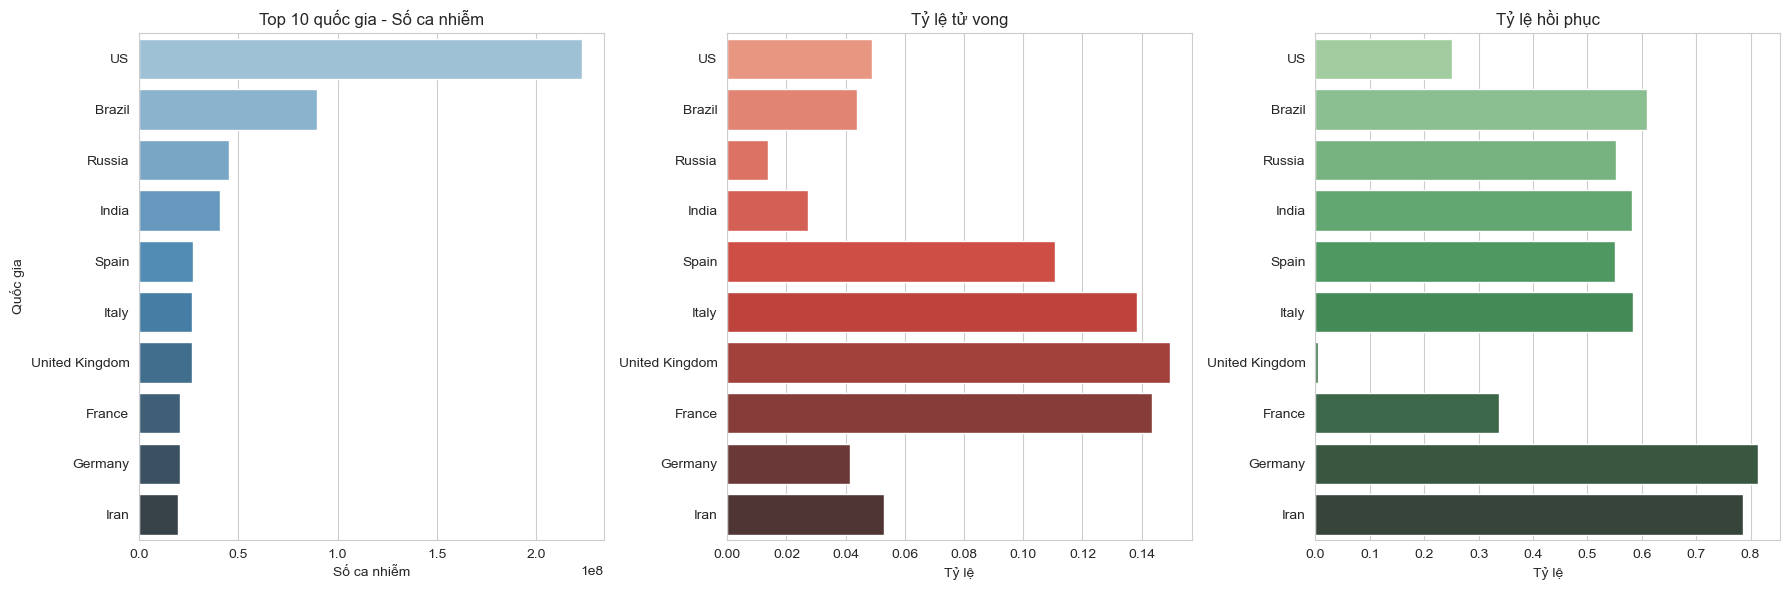

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df là dataframe đã load và các cột đều viết thường
df = df.copy()
df.columns = df.columns.str.lower()

# Tính tổng số theo quốc gia
country_stats = df.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Tính tỷ lệ
country_stats['death_rate'] = country_stats['deaths'] / country_stats['confirmed']
country_stats['recovery_rate'] = country_stats['recovered'] / country_stats['confirmed']

# Top 10 quốc gia có số ca nhiễm cao nhất
top10 = country_stats.sort_values('confirmed', ascending=False).head(10)

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.set_style("whitegrid")

# Biểu đồ 1: Tổng số ca nhiễm
sns.barplot(data=top10, y='country_region', x='confirmed', hue='country_region', palette='Blues_d', legend=False, ax=axes[0])
axes[0].set_title('Top 10 quốc gia - Số ca nhiễm')
axes[0].set_xlabel('Số ca nhiễm')
axes[0].set_ylabel('Quốc gia')

# Biểu đồ 2: Tỷ lệ tử vong
sns.barplot(data=top10, y='country_region', x='death_rate', hue='country_region', palette='Reds_d', legend=False, ax=axes[1])
axes[1].set_title('Tỷ lệ tử vong')
axes[1].set_xlabel('Tỷ lệ')
axes[1].set_ylabel('')

# Biểu đồ 3: Tỷ lệ hồi phục
sns.barplot(data=top10, y='country_region', x='recovery_rate', hue='country_region', palette='Greens_d', legend=False, ax=axes[2])
axes[2].set_title('Tỷ lệ hồi phục')
axes[2].set_xlabel('Tỷ lệ')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


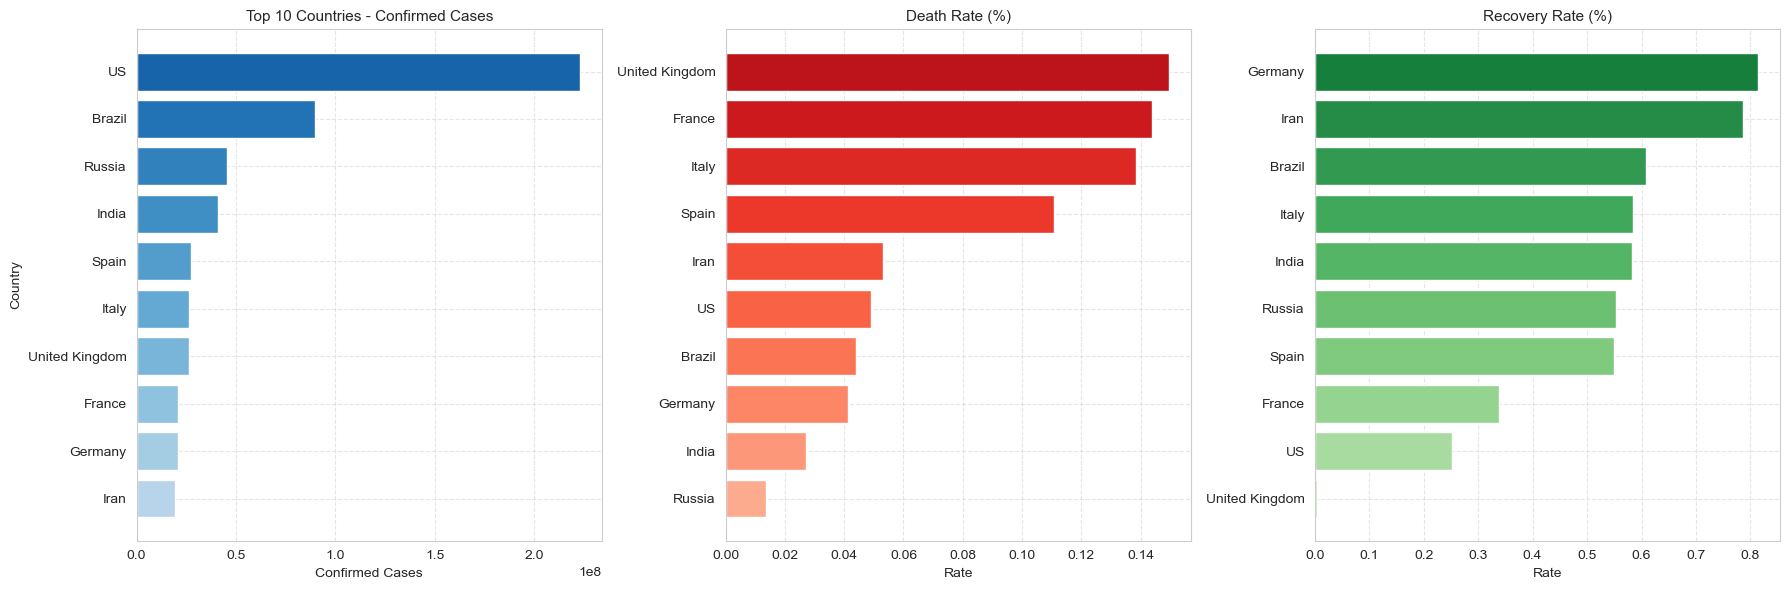

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume df is the loaded DataFrame with all lowercase column names
df = df.copy()
df.columns = df.columns.str.lower()

# Compute total counts by country
country_stats = df.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Calculate death and recovery rates
country_stats['death_rate'] = country_stats['deaths'] / country_stats['confirmed']
country_stats['recovery_rate'] = country_stats['recovered'] / country_stats['confirmed']

# Top 10 countries with the highest number of confirmed cases
top10 = country_stats.sort_values('confirmed', ascending=False).head(10)

# Sort each DataFrame for better visualization
dfplot1 = top10.sort_values('confirmed', ascending=True)
dfplot2 = top10.sort_values('death_rate', ascending=True)
dfplot3 = top10.sort_values('recovery_rate', ascending=True)

# Create layout for 3 subplots
plt.figure(figsize=(18, 6))

# --- Subplot 1: Total Confirmed Cases ---
plt.subplot(1, 3, 1)
plt.barh(
    y=dfplot1['country_region'],
    width=dfplot1['confirmed'],
    color=plt.cm.Blues(np.linspace(0.3, 0.8, len(dfplot1)))
)
plt.title('Top 10 Countries - Confirmed Cases', fontsize=11)
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Death Rate ---
plt.subplot(1, 3, 2)
plt.barh(
    y=dfplot2['country_region'],
    width=dfplot2['death_rate'],
    color=plt.cm.Reds(np.linspace(0.3, 0.8, len(dfplot2)))
)
plt.title('Death Rate (%)', fontsize=11)
plt.xlabel('Rate')
plt.ylabel('')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 3: Recovery Rate ---
plt.subplot(1, 3, 3)
plt.barh(
    y=dfplot3['country_region'],
    width=dfplot3['recovery_rate'],
    color=plt.cm.Greens(np.linspace(0.3, 0.8, len(dfplot3)))
)
plt.title('Recovery Rate (%)', fontsize=11)
plt.xlabel('Rate')
plt.ylabel('')
plt.grid(True, linestyle='--', alpha=0.5)

# Final layout adjustment
plt.tight_layout()
plt.show()


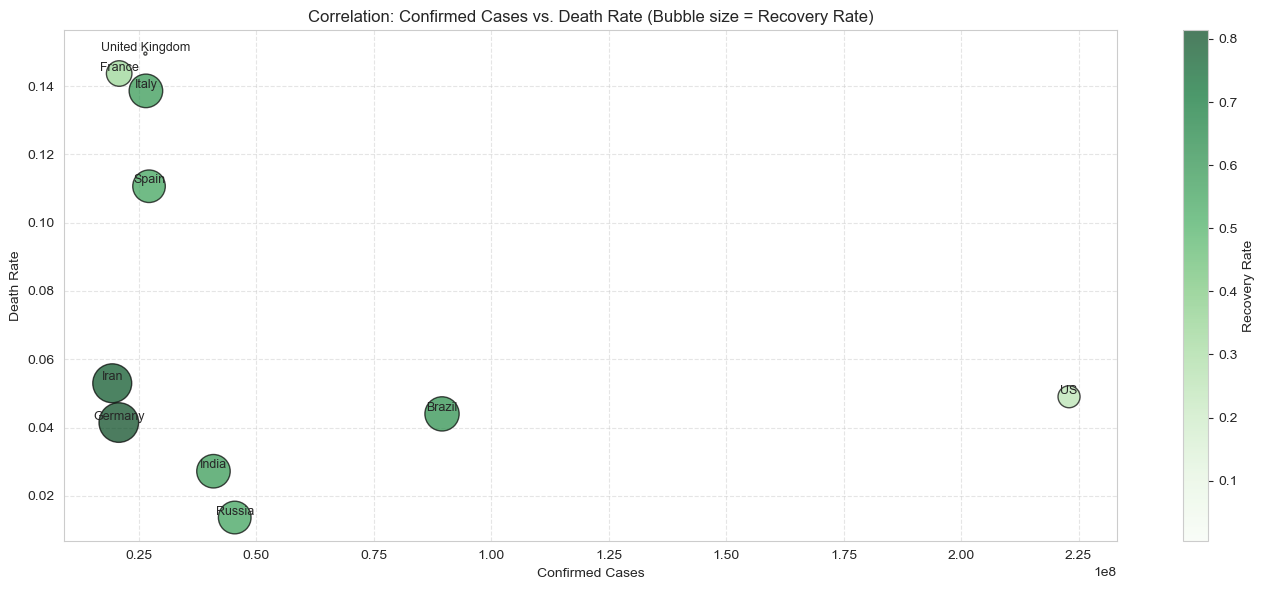

In [203]:
import matplotlib.pyplot as plt

# Dữ liệu: top 10 quốc gia theo số ca nhiễm
top10 = country_stats.sort_values('confirmed', ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 6))
scatter = plt.scatter(
    x=top10['confirmed'],
    y=top10['death_rate'],
    s=top10['recovery_rate'] * 1000,  # scale size by recovery rate
    c=top10['recovery_rate'],         # color also by recovery rate
    cmap='Greens',
    alpha=0.7,
    edgecolor='k'
)

# Annotate country names
for i, row in top10.iterrows():
    plt.text(row['confirmed'], row['death_rate'], row['country_region'], fontsize=9,
             ha='center', va='bottom')

# Axis labels and title
plt.xlabel('Confirmed Cases')
plt.ylabel('Death Rate')
plt.title('Correlation: Confirmed Cases vs. Death Rate (Bubble size = Recovery Rate)')
plt.colorbar(scatter, label='Recovery Rate')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**For the 10 countries with the highest confirmed cases:**

-   Death rate from highest to lowest: UK, France, Italy, Spain, Iran, US, Brazil, Germany, India, Russia

-   Recovery rate from highest to lowest: Germany, Iran, Brazil, Italy, India, Russia, Spain, France

*There is no clear correlation between the number of confirmed cases and the death rate. The 10 countries with the highest number of cases are all highly or moderately developed nations, yet they have very high case numbers. This could be due to higher transparency in data reporting or differences in the methods of data collection and reporting.*

#### 🇬🇧 Analysis specific to United Kingdom

COVID-19 Statistics for United Kingdom:
- Total confirmed cases: 26,388,768
- Total deaths: 3,944,824
- Total recoveries: 124,701
- Death rate: 14.95%
- Recovery rate: 0.47%


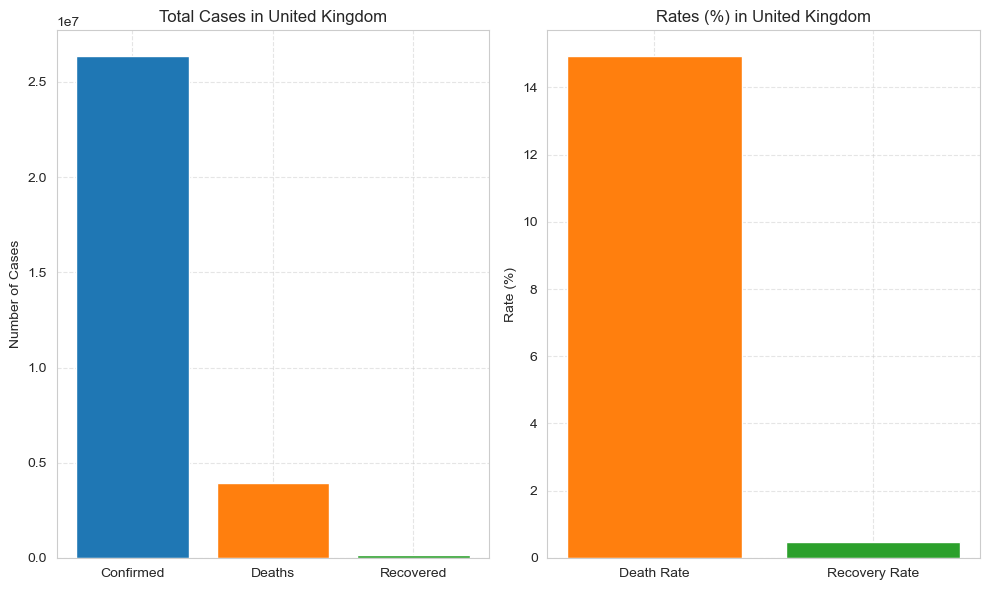

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume df is the loaded dataframe, and all columns are in lowercase
df = df.copy()
df.columns = df.columns.str.lower()

# Filter data for United Kingdom
uk_data = df[df['country_region'] == 'United Kingdom'].copy()

# Calculate total confirmed cases, deaths, and recoveries
uk_stats = uk_data.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Calculate death rate and recovery rate
uk_stats['death_rate'] = uk_stats['deaths'] / uk_stats['confirmed']
uk_stats['recovery_rate'] = uk_stats['recovered'] / uk_stats['confirmed']

# Print summary statistics
print("COVID-19 Statistics for United Kingdom:")
print(f"- Total confirmed cases: {uk_stats['confirmed'].values[0]:,}")
print(f"- Total deaths: {uk_stats['deaths'].values[0]:,}")
print(f"- Total recoveries: {uk_stats['recovered'].values[0]:,}")
print(f"- Death rate: {uk_stats['death_rate'].values[0] * 100:.2f}%")
print(f"- Recovery rate: {uk_stats['recovery_rate'].values[0] * 100:.2f}%")

# Plot the data for United Kingdom
plt.figure(figsize=(10, 6))

# --- Subplot 1: Total confirmed, deaths, and recoveries ---
plt.subplot(1, 2, 1)
categories = ['Confirmed', 'Deaths', 'Recovered']
values = [
    uk_stats['confirmed'].values[0],
    uk_stats['deaths'].values[0],
    uk_stats['recovered'].values[0]
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.bar(categories, values, color=colors)
plt.title('Total Cases in United Kingdom')
plt.ylabel('Number of Cases')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Death rate and recovery rate ---
plt.subplot(1, 2, 2)
rates = ['Death Rate', 'Recovery Rate']
rate_values = [
    uk_stats['death_rate'].values[0] * 100,
    uk_stats['recovery_rate'].values[0] * 100
]
plt.bar(rates, rate_values, color=['#ff7f0e', '#2ca02c'])
plt.title('Rates (%) in United Kingdom')
plt.ylabel('Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

COVID-19 Statistics for United Kingdom:
- Total Confirmed Cases: 26,388,768
- Total Deaths: 3,944,824
- Total Recovered: 124,701
- Death Rate: 14.95%
- Recovery Rate: 0.47%


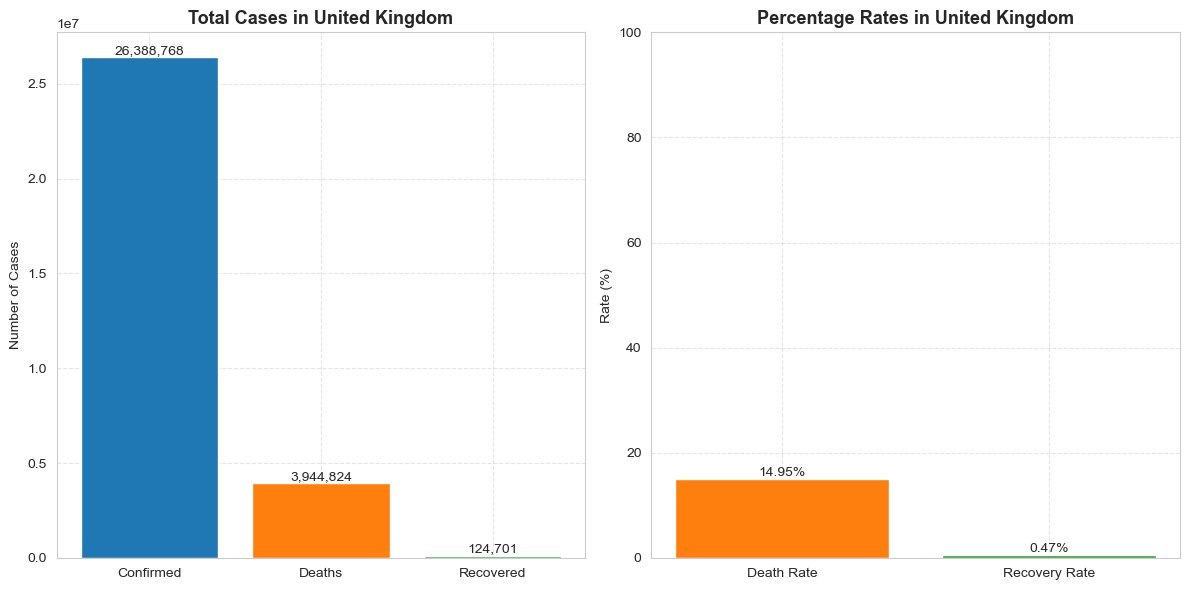

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume df is already loaded
df = df.copy()
df.columns = df.columns.str.lower()

# Filter data for United Kingdom
uk_data = df[df['country_region'] == 'United Kingdom'].copy()

# Aggregate total confirmed, deaths, and recovered cases
uk_stats = uk_data.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Calculate death rate and recovery rate
uk_stats['death_rate'] = uk_stats['deaths'] / uk_stats['confirmed']
uk_stats['recovery_rate'] = uk_stats['recovered'] / uk_stats['confirmed']

# Print summary statistics
print("COVID-19 Statistics for United Kingdom:")
print(f"- Total Confirmed Cases: {uk_stats['confirmed'].values[0]:,}")
print(f"- Total Deaths: {uk_stats['deaths'].values[0]:,}")
print(f"- Total Recovered: {uk_stats['recovered'].values[0]:,}")
print(f"- Death Rate: {uk_stats['death_rate'].values[0] * 100:.2f}%")
print(f"- Recovery Rate: {uk_stats['recovery_rate'].values[0] * 100:.2f}%")

# Plotting
plt.figure(figsize=(12, 6))

# --- Subplot 1: Total Cases ---
plt.subplot(1, 2, 1)
categories = ['Confirmed', 'Deaths', 'Recovered']
values = [
    uk_stats['confirmed'].values[0],
    uk_stats['deaths'].values[0],
    uk_stats['recovered'].values[0]
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars1 = plt.bar(categories, values, color=colors)

# Add value labels to bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Total Cases in United Kingdom', fontsize=13, fontweight='bold')
plt.ylabel('Number of Cases')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Percentage Rates ---
plt.subplot(1, 2, 2)
rates = ['Death Rate', 'Recovery Rate']
rate_values = [
    uk_stats['death_rate'].values[0] * 100,
    uk_stats['recovery_rate'].values[0] * 100
]
bars2 = plt.bar(rates, rate_values, color=['#ff7f0e', '#2ca02c'])

# Add percentage labels to bars
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Percentage Rates in United Kingdom', fontsize=13, fontweight='bold')
plt.ylabel('Rate (%)')
plt.ylim(0, 100)  # Limit y-axis to 0–100% for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


#### 🇺🇸 Analysis specific to the United States (USA)

COVID-19 Statistics for US:
- Total Confirmed Cases: 222,970,796
- Total Deaths: 10,927,928
- Total Recovered: 56,123,129
- Death Rate: 4.90%
- Recovery Rate: 25.17%


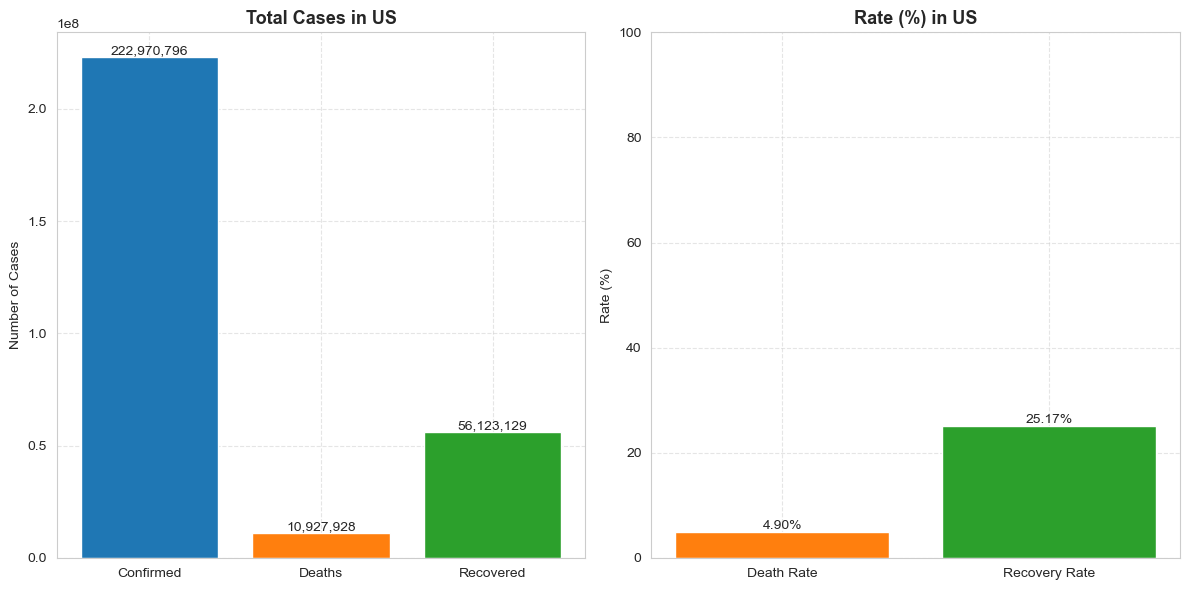

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume df has already been loaded
df = df.copy()
df.columns = df.columns.str.lower()

# Filter data for the US
us_data = df[df['country_region'] == 'US'].copy()

# Calculate total confirmed, deaths, and recoveries
us_stats = us_data.groupby('country_region')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Calculate death rate and recovery rate
us_stats['death_rate'] = us_stats['deaths'] / us_stats['confirmed']
us_stats['recovery_rate'] = us_stats['recovered'] / us_stats['confirmed']

# Print summary information
print("COVID-19 Statistics for US:")
print(f"- Total Confirmed Cases: {us_stats['confirmed'].values[0]:,}")
print(f"- Total Deaths: {us_stats['deaths'].values[0]:,}")
print(f"- Total Recovered: {us_stats['recovered'].values[0]:,}")
print(f"- Death Rate: {us_stats['death_rate'].values[0] * 100:.2f}%")
print(f"- Recovery Rate: {us_stats['recovery_rate'].values[0] * 100:.2f}%")

# Plotting charts
plt.figure(figsize=(12, 6))

# --- Subplot 1: Total Cases ---
plt.subplot(1, 2, 1)
categories = ['Confirmed', 'Deaths', 'Recovered']
values = [
    us_stats['confirmed'].values[0],
    us_stats['deaths'].values[0],
    us_stats['recovered'].values[0]
]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars1 = plt.bar(categories, values, color=colors)

# Add value labels to bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', 
             ha='center', va='bottom', fontsize=10)

plt.title('Total Cases in US', fontsize=13, fontweight='bold')
plt.ylabel('Number of Cases')
plt.grid(True, linestyle='--', alpha=0.5)

# --- Subplot 2: Rate (%) ---
plt.subplot(1, 2, 2)
rates = ['Death Rate', 'Recovery Rate']
rate_values = [
    us_stats['death_rate'].values[0] * 100,
    us_stats['recovery_rate'].values[0] * 100
]
bars2 = plt.bar(rates, rate_values, color=['#ff7f0e', '#2ca02c'])

# Add percentage value labels
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Rate (%) in US', fontsize=13, fontweight='bold')
plt.ylabel('Rate (%)')
plt.ylim(0, 100)  # Limit from 0 to 100% for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### 3. 📈 Death and recovery rates over time

In [207]:
# Calculate death and recovery rates

# Assume df is a DataFrame containing COVID-19 data
df['death_rate'] = df['deaths'] / df['confirmed']
df['recovery_rate'] = df['recovered'] / df['confirmed']


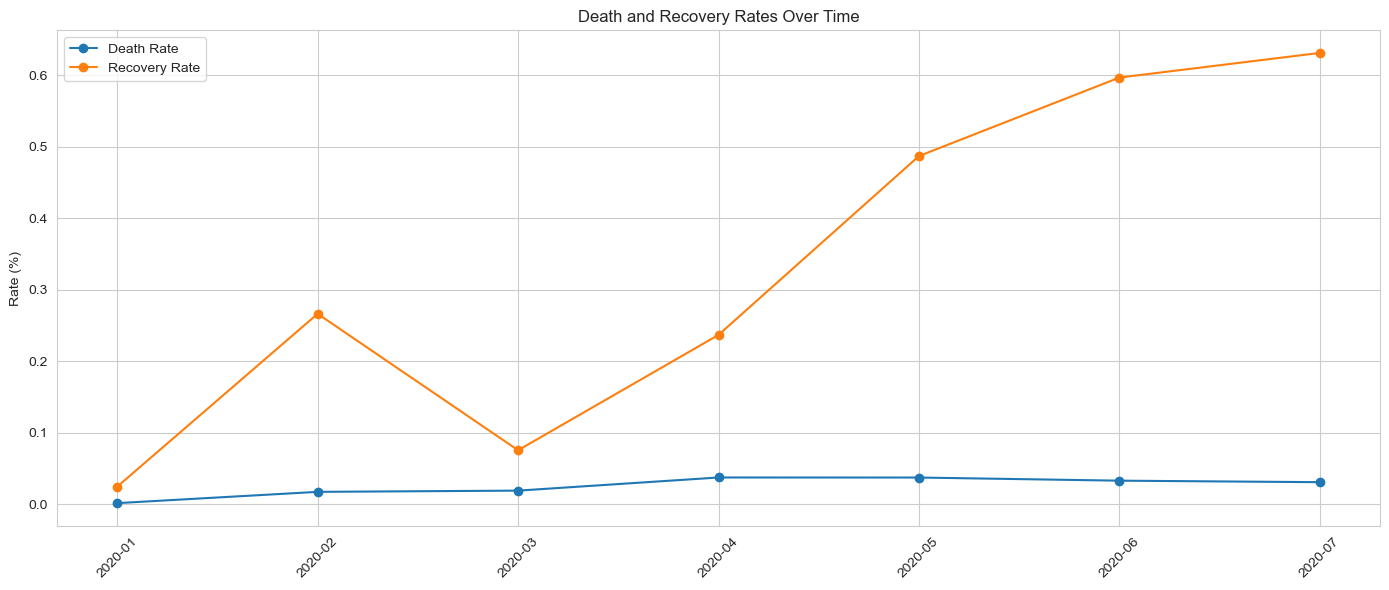

In [208]:
# Time-based comparison (e.g. by month-year)

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a 'month_year' column
df['month_year'] = df['date'].dt.to_period('M').astype(str)

# Calculate average rates by month-year
monthly = df.groupby('month_year')[['death_rate', 'recovery_rate']].mean().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(monthly['month_year'], monthly['death_rate'], label='Death Rate', marker='o')
plt.plot(monthly['month_year'], monthly['recovery_rate'], label='Recovery Rate', marker='o')
plt.xticks(rotation=45)
plt.ylabel("Rate (%)")
plt.title("Death and Recovery Rates Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


⛑️💊💊**Conclusion:** During the first two months, the recovery rate was low, possibly because no effective treatment had been found. Since March 2020, the recovery rate has steadily increased as effective treatment methods became available.

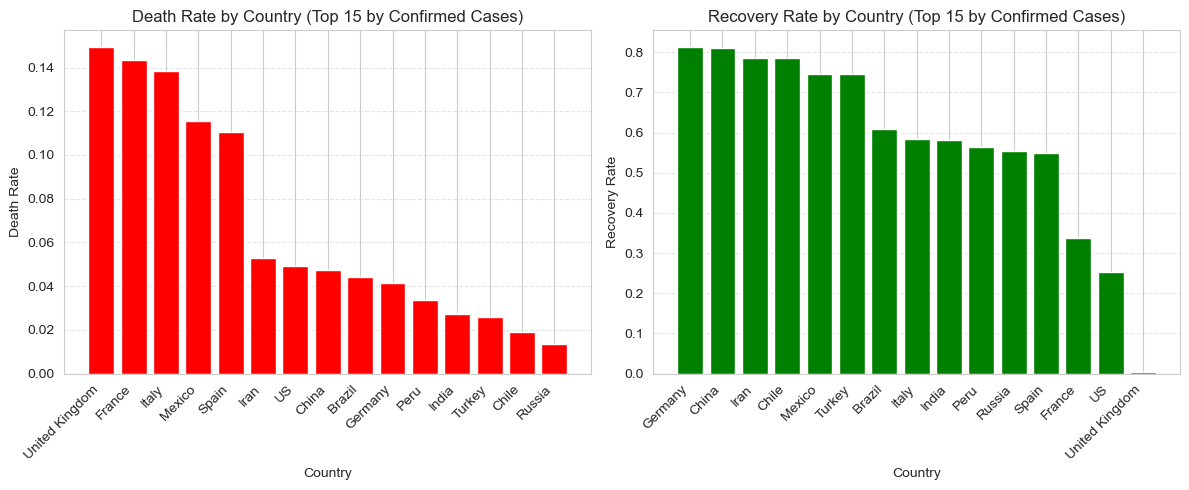

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate death and recovery rates
df_plot = df[['country_region', 'confirmed', 'deaths', 'recovered']].copy()
df_plot = df_plot.groupby('country_region').sum().reset_index()

# Remove countries with confirmed = 0 to avoid division by zero
df_plot = df_plot[df_plot['confirmed'] > 0]

df_plot['death_rate'] = df_plot['deaths'] / df_plot['confirmed']
df_plot['recovery_rate'] = df_plot['recovered'] / df_plot['confirmed']

# Select top 15 countries with the highest number of confirmed cases
top15 = df_plot.sort_values('confirmed', ascending=False).head(15)

# Sort by death_rate for better chart appearance
top15 = top15.sort_values('death_rate', ascending=False)

# Plot the charts
plt.figure(figsize=(12, 5))

# Subplot 1: Death Rate
plt.subplot(1, 2, 1)
plt.bar(top15['country_region'], top15['death_rate'], color='red')
plt.title('Death Rate by Country (Top 15 by Confirmed Cases)', fontsize=12)
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Subplot 2: Recovery Rate
plt.subplot(1, 2, 2)
# Sort separately by recovery_rate
top15_recovery = top15.sort_values('recovery_rate', ascending=False)
plt.bar(top15_recovery['country_region'], top15_recovery['recovery_rate'], color='green')
plt.title('Recovery Rate by Country (Top 15 by Confirmed Cases)', fontsize=12)
plt.xlabel('Country')
plt.ylabel('Recovery Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Optimize layout
plt.tight_layout()
plt.show()


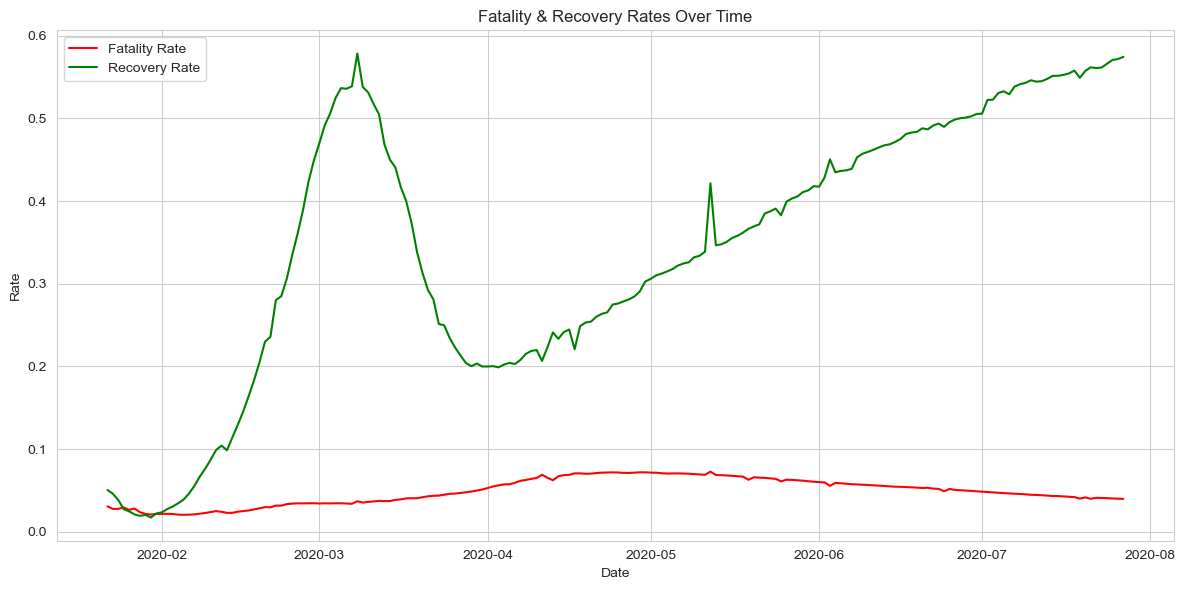

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume column names are lowercase: 'date', 'confirmed', 'deaths', 'recovered'
# If not, rename the columns accordingly
df['date'] = pd.to_datetime(df['date'])

# Group data by date
daily_stats = df.groupby('date').agg({
    'confirmed': 'sum',
    'deaths': 'sum',
    'recovered': 'sum'
}).reset_index()

# Calculate rates
daily_stats['fatality_rate'] = daily_stats['deaths'] / daily_stats['confirmed']
daily_stats['recovery_rate'] = daily_stats['recovered'] / daily_stats['confirmed']

# Remove rows with confirmed = 0 (to avoid division by zero)
daily_stats = daily_stats[daily_stats['confirmed'] > 0]

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_stats['date'], daily_stats['fatality_rate'], label='Fatality Rate', color='red')
plt.plot(daily_stats['date'], daily_stats['recovery_rate'], label='Recovery Rate', color='green')
plt.title('Fatality & Recovery Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


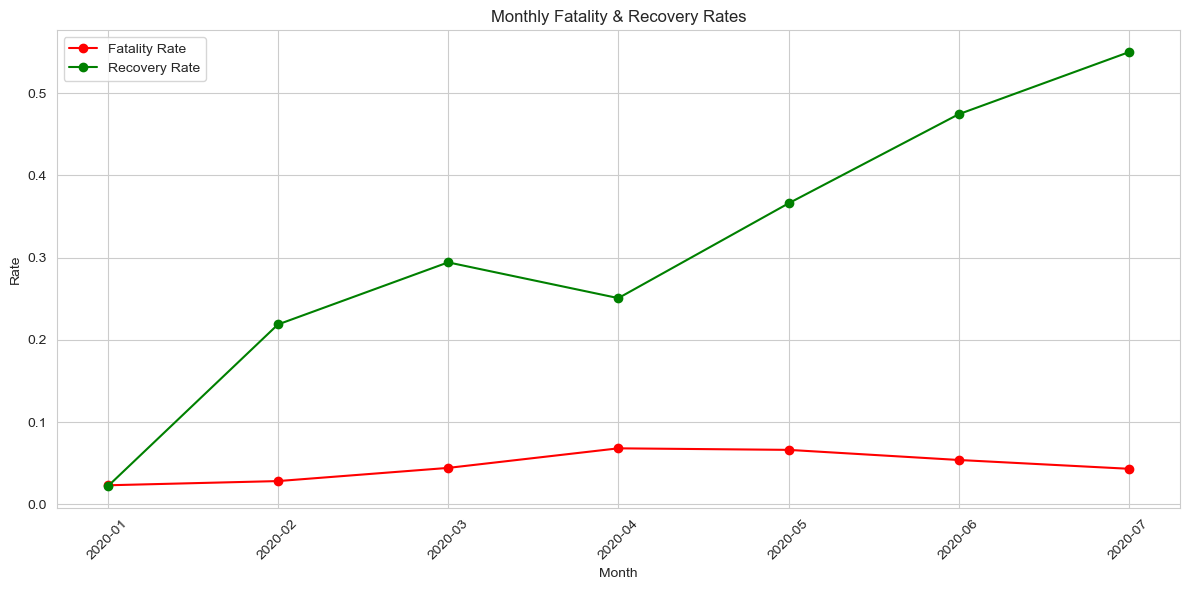

In [211]:
df['month'] = df['date'].dt.to_period('M')
monthly_stats = df.groupby('month').agg({
    'confirmed': 'sum',
    'deaths': 'sum',
    'recovered': 'sum'
}).reset_index()

monthly_stats['fatality_rate'] = monthly_stats['deaths'] / monthly_stats['confirmed']
monthly_stats['recovery_rate'] = monthly_stats['recovered'] / monthly_stats['confirmed']
monthly_stats = monthly_stats[monthly_stats['confirmed'] > 0]

# Plot line chart 
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats['month'].astype(str), monthly_stats['fatality_rate'], label='Fatality Rate', marker='o', color='red')
plt.plot(monthly_stats['month'].astype(str), monthly_stats['recovery_rate'], label='Recovery Rate', marker='o', color='green')
plt.title('Monthly Fatality & Recovery Rates')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📌 Conclusion:

From February to August 2020, the recovery rate showed dynamic shifts—initially rising sharply until April, followed by a brief decline, then gradually improving again through August. This reflects early recovery momentum potentially linked to increased clinical understanding and health system responses. In contrast, the fatality rate remained relatively stable with minor fluctuations, indicating that while treatment effectiveness may have improved, the overall fatality risk did not substantially increase or decrease during this period.

### 4. 📆 Time group analysis

In [212]:
# Create time groups by quarter and year

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Add 'year' and 'quarter' columns
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.to_period('Q').astype(str)  # Example: '2020Q1'

# Calculate fatality and recovery rates (if not calculated yet)
df['death_rate'] = df['deaths'] / df['confirmed'] * 100
df['recovery_rate'] = df['recovered'] / df['confirmed'] * 100

# Group by quarter
quarterly = df.groupby('quarter')[['confirmed', 'deaths', 'recovered', 'death_rate', 'recovery_rate']].mean().reset_index()

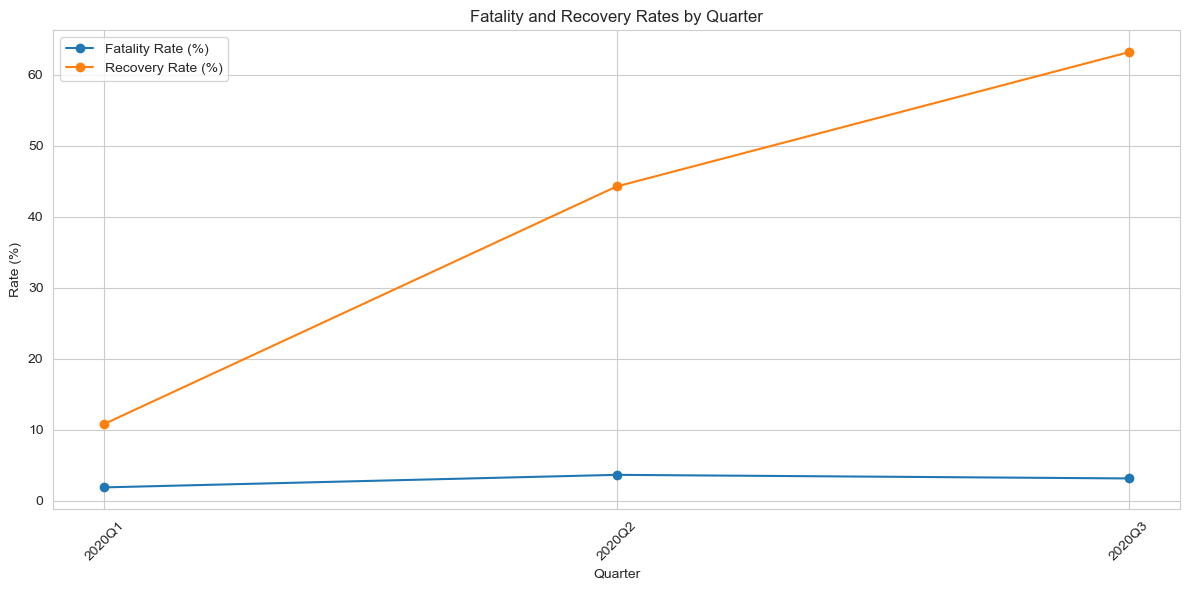

In [213]:
# Plot line chart by quarter

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(quarterly['quarter'], quarterly['death_rate'], label='Fatality Rate (%)', marker='o')
plt.plot(quarterly['quarter'], quarterly['recovery_rate'], label='Recovery Rate (%)', marker='o')
plt.xticks(rotation=45)
plt.title("Fatality and Recovery Rates by Quarter")
plt.ylabel("Rate (%)")
plt.xlabel("Quarter")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Conclusion:

Throughout Q1 to Q3 of 2020, the fatality rate remained low and relatively stable—indicating that the proportion of deaths among confirmed cases did not vary drastically despite evolving conditions. In contrast, the recovery rate surged dramatically, increasing from roughly 10% in Q1 to 60% by Q3. This sharp upward trend likely reflects improvements in treatment protocols, healthcare readiness, and perhaps data reporting accuracy over time.

🚫⛔🚫 **Suppose 01-04-2020 is lockdown**

In [214]:
# Compare based on lockdown or vaccine rollout phases

# Manually label time periods based on specific milestones
def classify_period(date):
    if date < pd.Timestamp('2020-04-01'):
        return 'Before lockdown'
    elif date < pd.Timestamp('2021-01-01'):
        return 'During lockdown'
    elif date < pd.Timestamp('2021-06-01'):
        return 'Vaccine rollout'
    else:
        return 'Post-vaccine'

df['period'] = df['date'].apply(classify_period)

# Calculate averages for each period
period_stats = df.groupby('period')[['confirmed', 'deaths', 'recovered', 'death_rate', 'recovery_rate']].mean().reset_index()


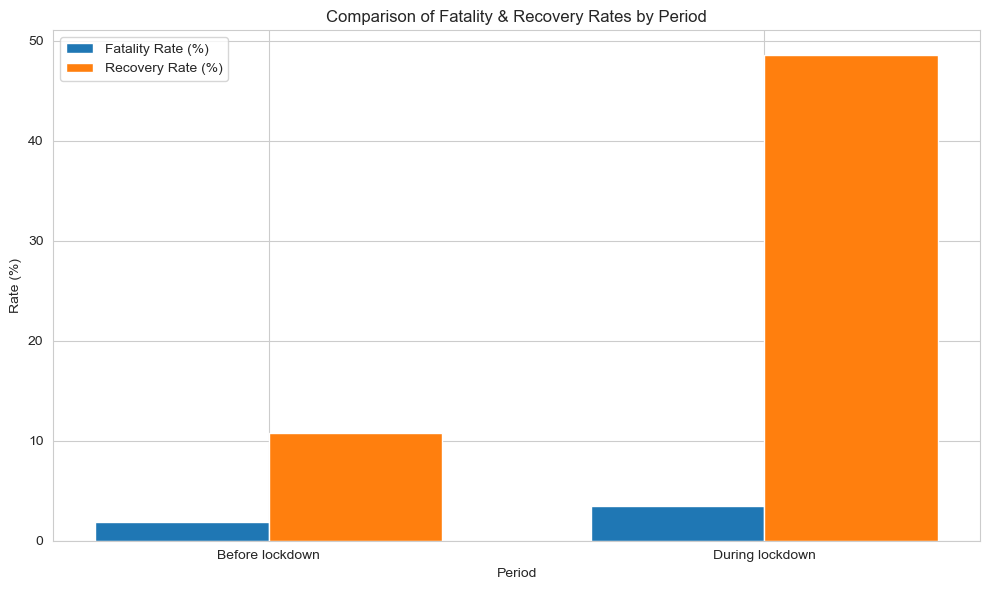

In [215]:
import numpy as np
import matplotlib.pyplot as plt

# Set bar width and group positions
bar_width = 0.35
x = np.arange(len(period_stats))  # Positions for each group

plt.figure(figsize=(10, 6))

# Plot each bar group
plt.bar(x - bar_width/2, period_stats['death_rate'], width=bar_width, label='Fatality Rate (%)')
plt.bar(x + bar_width/2, period_stats['recovery_rate'], width=bar_width, label='Recovery Rate (%)')

# Add labels and configure chart
plt.title("Comparison of Fatality & Recovery Rates by Period")
plt.xlabel("Period")
plt.ylabel("Rate (%)")
plt.xticks(x, period_stats['period'])  # X-axis labels by period
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


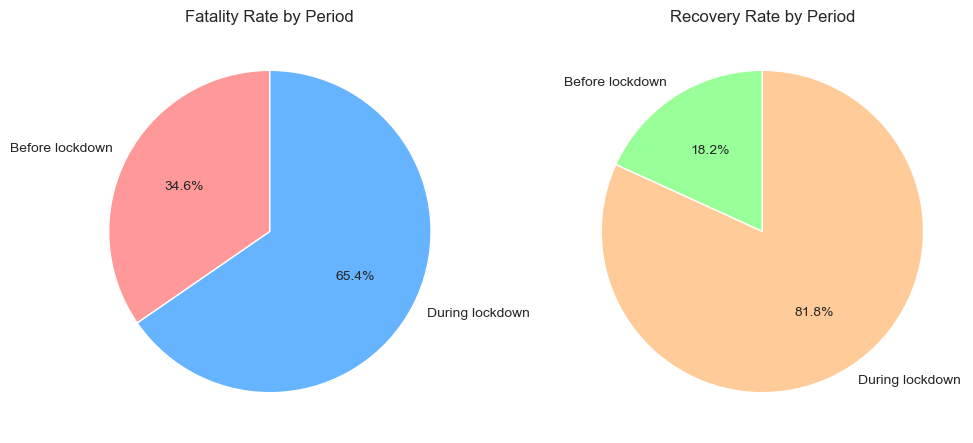

In [216]:
import matplotlib.pyplot as plt

# Step 1: Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 2: Assign period labels
df['period'] = df['date'].apply(lambda x: 'Before lockdown' if x < pd.Timestamp('2020-04-01') else 'During lockdown')

# Step 3: Calculate average fatality and recovery rates by period
period_stats = df.groupby('period')[['death_rate', 'recovery_rate']].mean().reset_index()

# Step 4: Plot two pie charts in a 1-row, 2-column layout
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart: Fatality rate
axs[0].pie(period_stats['death_rate'], 
           labels=period_stats['period'], 
           autopct='%.1f%%', 
           startangle=90, 
           colors=['#ff9999','#66b3ff'])
axs[0].set_title("Fatality Rate by Period")

# Pie chart: Recovery rate
axs[1].pie(period_stats['recovery_rate'], 
           labels=period_stats['period'], 
           autopct='%.1f%%', 
           startangle=90, 
           colors=['#99ff99','#ffcc99'])
axs[1].set_title("Recovery Rate by Period")

plt.tight_layout()
plt.show()


MORE information

In [237]:
# Step 1: Prepare data and create time groups

import pandas as pd

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create year and quarter columns
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.to_period('Q').astype(str)

# Group by quarter and calculate totals
df_quarter = df.groupby('quarter')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

# Calculate death rate and recovery rate
df_quarter['death_rate'] = df_quarter['deaths'] / df_quarter['confirmed']
df_quarter['recovery_rate'] = df_quarter['recovered'] / df_quarter['confirmed']


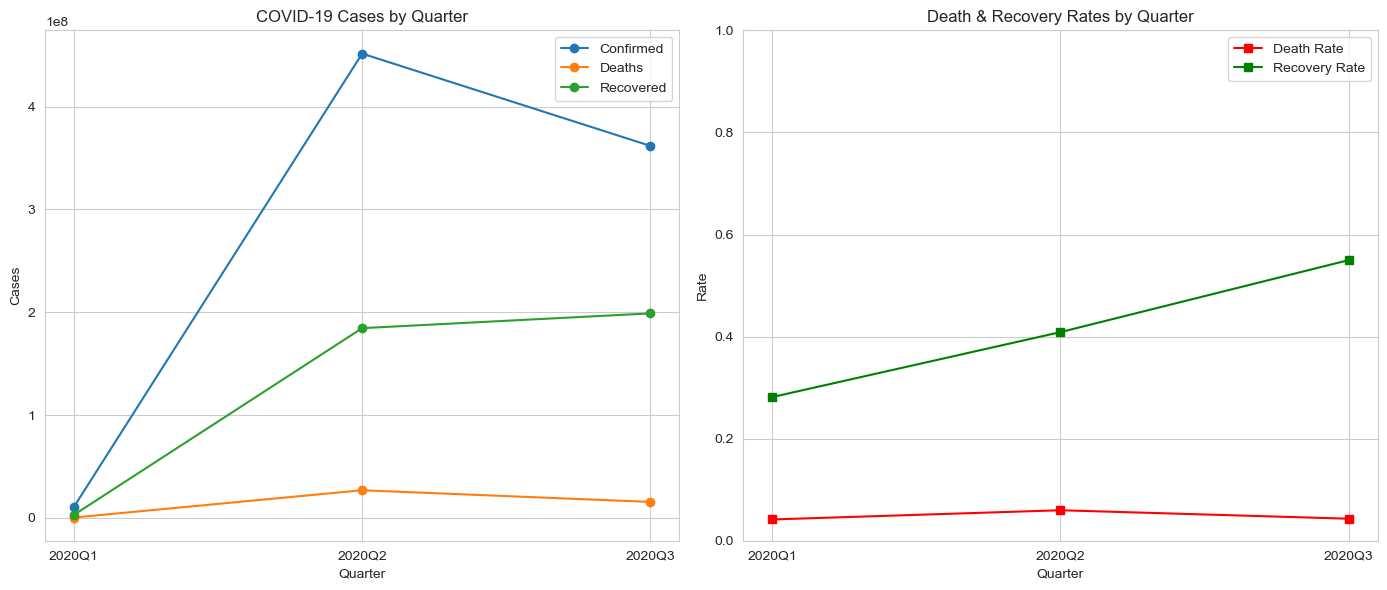

In [238]:
# Step 2: Plot charts by quarter

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Chart 1: Number of cases
plt.subplot(1, 2, 1)
plt.plot(df_quarter['quarter'], df_quarter['confirmed'], marker='o', label='Confirmed')
plt.plot(df_quarter['quarter'], df_quarter['deaths'], marker='o', label='Deaths')
plt.plot(df_quarter['quarter'], df_quarter['recovered'], marker='o', label='Recovered')
plt.title('COVID-19 Cases by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)

# Chart 2: Death and recovery rates
plt.subplot(1, 2, 2)
plt.plot(df_quarter['quarter'], df_quarter['death_rate'], marker='s', label='Death Rate', color='red')
plt.plot(df_quarter['quarter'], df_quarter['recovery_rate'], marker='s', label='Recovery Rate', color='green')
plt.title('Death & Recovery Rates by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Rate')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


📌 Conclusion:

Between Q1 and Q3 of 2020, the number of confirmed cases soared rapidly in Q2, then declined in Q3, suggesting a peak and partial containment phase. The death count remained low and stable, while recoveries rose quarter by quarter — signaling improved medical response and patient outcomes.

Notably, the recovery rate experienced a strong upward trend, more than doubling from Q1 to Q3, whereas the fatality rate stayed consistently low and even dipped slightly. This implies that healthcare systems adapted effectively, achieving higher recovery success without an accompanying spike in mortality.

### 5. Outbreak analysis

In [239]:
import pandas as pd

# 1. Read data
# df = pd.read_csv('vietnam_covid_data.csv')

# 2. Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# 3. Add 'month_year' column
df['month_year'] = df['date'].dt.to_period('M')

# 4. Remove rows with negative values in key columns
df = df[
    (df['confirmed'] >= 0) &
    (df['deaths'] >= 0) &
    (df['recovered'] >= 0) &
    (df['active'] >= 0) &
    (df['new_cases'] >= 0) &
    (df['new_deaths'] >= 0)
]

# 5. Create a 'lockdown' variable to separate data before/after social distancing
lockdown_date = pd.to_datetime('2021-04-01')
df['lockdown'] = df['date'].apply(lambda x: 'Before Lockdown' if x < lockdown_date else 'After Lockdown')

# 6. Calculate total confirmed cases and deaths before/after lockdown
summary = df.groupby('lockdown')[['confirmed', 'deaths']].sum()

# 7. Calculate death rate = deaths / confirmed
summary['Death Rate (%)'] = round(summary['deaths'] / summary['confirmed'] * 100, 2)

# 8. Print results
print(summary)

# 9. (Optional) Export results to CSV
# summary.to_csv('summary_lockdown_analysis.csv')


                 confirmed    deaths  Death Rate (%)
lockdown                                            
Before Lockdown  824056522  43023287            5.22


⚰ **Conclusion:** Global COVID-19 death rate is `5.22%`

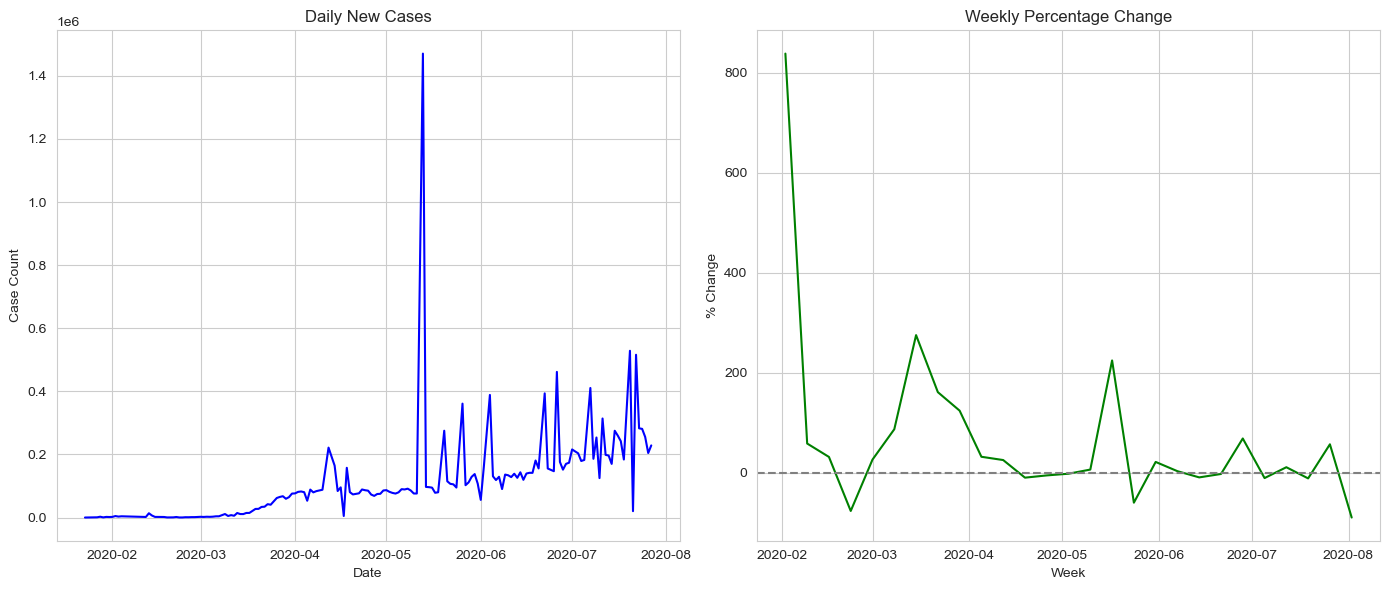

In [220]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume you have a DataFrame named df with columns: 'date', 'country', 'confirmed'

# Step 1: Convert the date column and aggregate total cases by day
df['date'] = pd.to_datetime(df['date'])
daily_df = df.groupby('date')['confirmed'].sum().reset_index()
daily_df = daily_df.sort_values('date')

# Step 2: Calculate new cases per day and percentage change
daily_df['daily_new'] = daily_df['confirmed'].diff()
daily_df['pct_change'] = daily_df['daily_new'].pct_change() * 100

# Remove negative values (if any)
daily_df = daily_df[daily_df['daily_new'] >= 0]

# Step 3: Compute weekly averages
weekly_df = daily_df.set_index('date').resample('W').sum().reset_index()
weekly_df['pct_change'] = weekly_df['daily_new'].pct_change() * 100

# ----------------- PLOTTING CHART -----------------
plt.figure(figsize=(14, 6))

# Subplot 1: Daily new cases
plt.subplot(1, 2, 1)
plt.plot(daily_df['date'], daily_df['daily_new'], label='Daily New Cases', color='blue')
plt.title('Daily New Cases')
plt.xlabel('Date')
plt.ylabel('Case Count')
plt.grid(True)
plt.tight_layout()

# Subplot 2: Weekly % change
plt.subplot(1, 2, 2)
plt.plot(weekly_df['date'], weekly_df['pct_change'], label='Weekly % Change', color='green')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Weekly Percentage Change')
plt.xlabel('Week')
plt.ylabel('% Change')
plt.grid(True)
plt.tight_layout()

plt.show()


🧠 This figure suggests that while the absolute case numbers rose sharply mid-year, the relative rate of new infections slowed in later months—a possible sign of improved public health strategies or natural ebb in infection dynamics.

✅ Meaning of Negative Values in Percentage Change Charts:

-   A negative value indicates a decrease in the number of cases compared to the previous period.

-   A positive value indicates an increase in the number of cases compared to the previous period.

🧠 Exams:

| Date | New Cases | 	% Change from Previous Day  |
| ---- | --------- | --------------------------- |
| 1/1  | 100       | —                           |
| 2/1  | 120       | +20%                        |
| 3/1  | 90        | -25%                        |

In this case, 90 is a decrease compared to 120 → the percentage chart will show a negative value, which is absolutely correct.

### 6. 🌍 Regional Analysis

In [221]:
df.head()

,date,country_region,confirmed,deaths,recovered,active,new_cases,new_deaths,new_recovered,who_region,...,month,year,month_year,calculated_active,active_match,death_rate,recovery_rate,quarter,period,lockdown
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Before lockdown,Trước giãn cách
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Before lockdown,Trước giãn cách
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Before lockdown,Trước giãn cách
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Before lockdown,Trước giãn cách
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,...,2020-01,2020,2020-01,0,True,NaN,NaN,2020Q1,Before lockdown,Trước giãn cách


In [242]:
# Calculate totals and average rates by region
# Group by WHO region
region_summary = df.groupby("who_region").agg({
    "confirmed": "sum",
    "deaths": "sum",
    "recovered": "sum",
    "active": "sum"
})

# Calculate death and recovery rates
region_summary["death_rate"] = region_summary["deaths"] / region_summary["confirmed"]
region_summary["recovery_rate"] = region_summary["recovered"] / region_summary["confirmed"]

# Clean up data: round values
region_summary = region_summary.round(4)

# Display results
region_summary.sort_values("confirmed", ascending=False)


,confirmed,deaths,recovered,active,death_rate,recovery_rate
who_region,,,,,,
Americas,400015685,19219682,156289944,224506059,0.0480,0.3907
Europe,246830467,19055771,122258200,105516496,0.0772,0.4953
Eastern Mediterranean,74080449,1923968,48050075,24106406,0.0260,0.6486
South-East Asia,55117856,1458130,30030301,23629425,0.0265,0.5448
Western Pacific,26240959,926499,18749246,6565214,0.0353,0.7145
Africa,21771106,439237,11183493,10148376,0.0202,0.5137


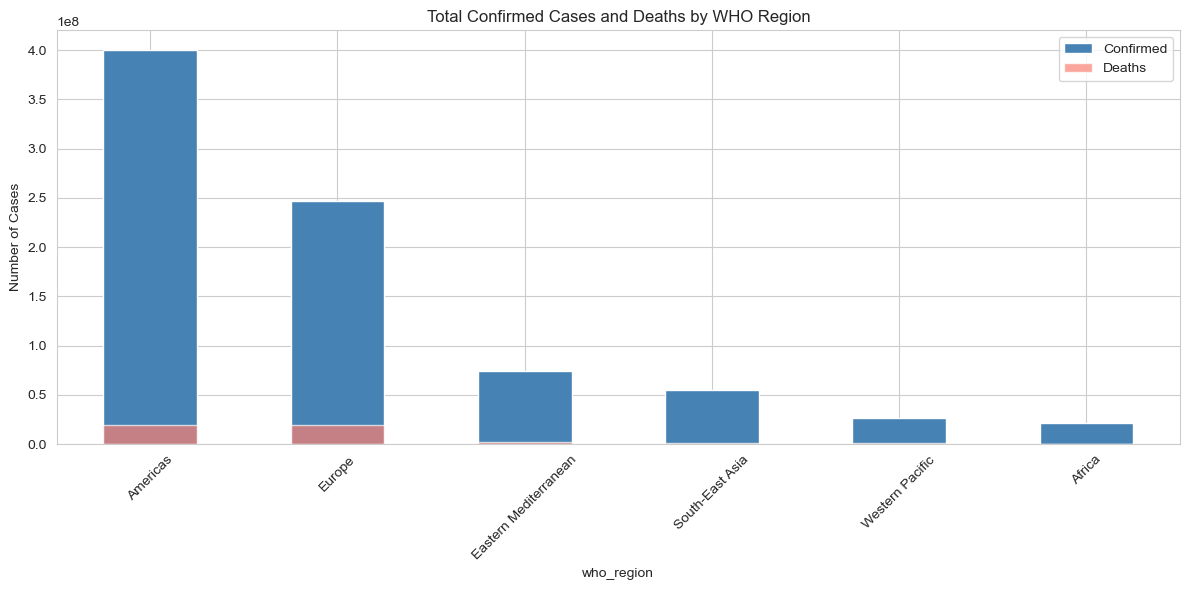

In [243]:
# Bar chart: Number of confirmed cases and deaths by region

import matplotlib.pyplot as plt

region_summary_sorted = region_summary.sort_values("confirmed", ascending=False)

plt.figure(figsize=(12,6))
region_summary_sorted["confirmed"].plot(kind="bar", color="steelblue", label="Confirmed")
region_summary_sorted["deaths"].plot(kind="bar", color="salmon", alpha=0.7, label="Deaths")

plt.title("Total Confirmed Cases and Deaths by WHO Region")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


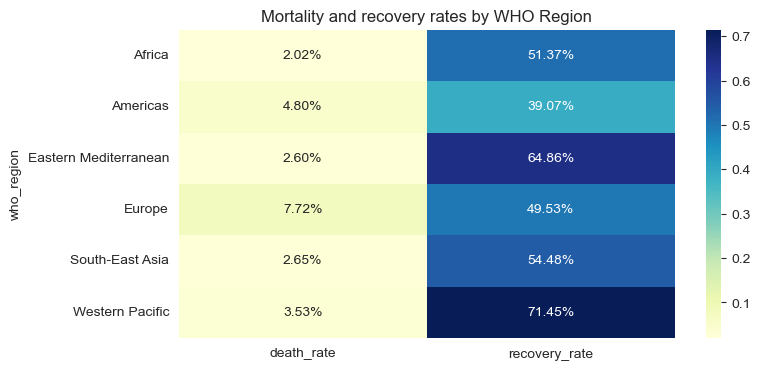

In [244]:
# Heatmap: Death and recovery rates by region

import seaborn as sns

plt.figure(figsize=(8,4))
sns.heatmap(region_summary[["death_rate", "recovery_rate"]], annot=True, cmap="YlGnBu", fmt=".2%")
plt.title("Mortality and recovery rates by WHO Region")
plt.show()


📍 **Conclusion:**

This regional comparison of COVID-19 mortality and recovery rates reveals stark disparities across WHO regions. Europe recorded the highest death rate at `7.72%`, indicating severe impact—potentially due to early outbreaks, aging populations, or healthcare strain. Conversely, the Western Pacific region exhibited the highest recovery rate of `71.45%`, suggesting effective mitigation strategies and healthcare response.

Regions like the Americas show both elevated death rates `(4.80%)` and the lowest recovery rate `(39.07%)`, highlighting a more challenging pandemic response trajectory.

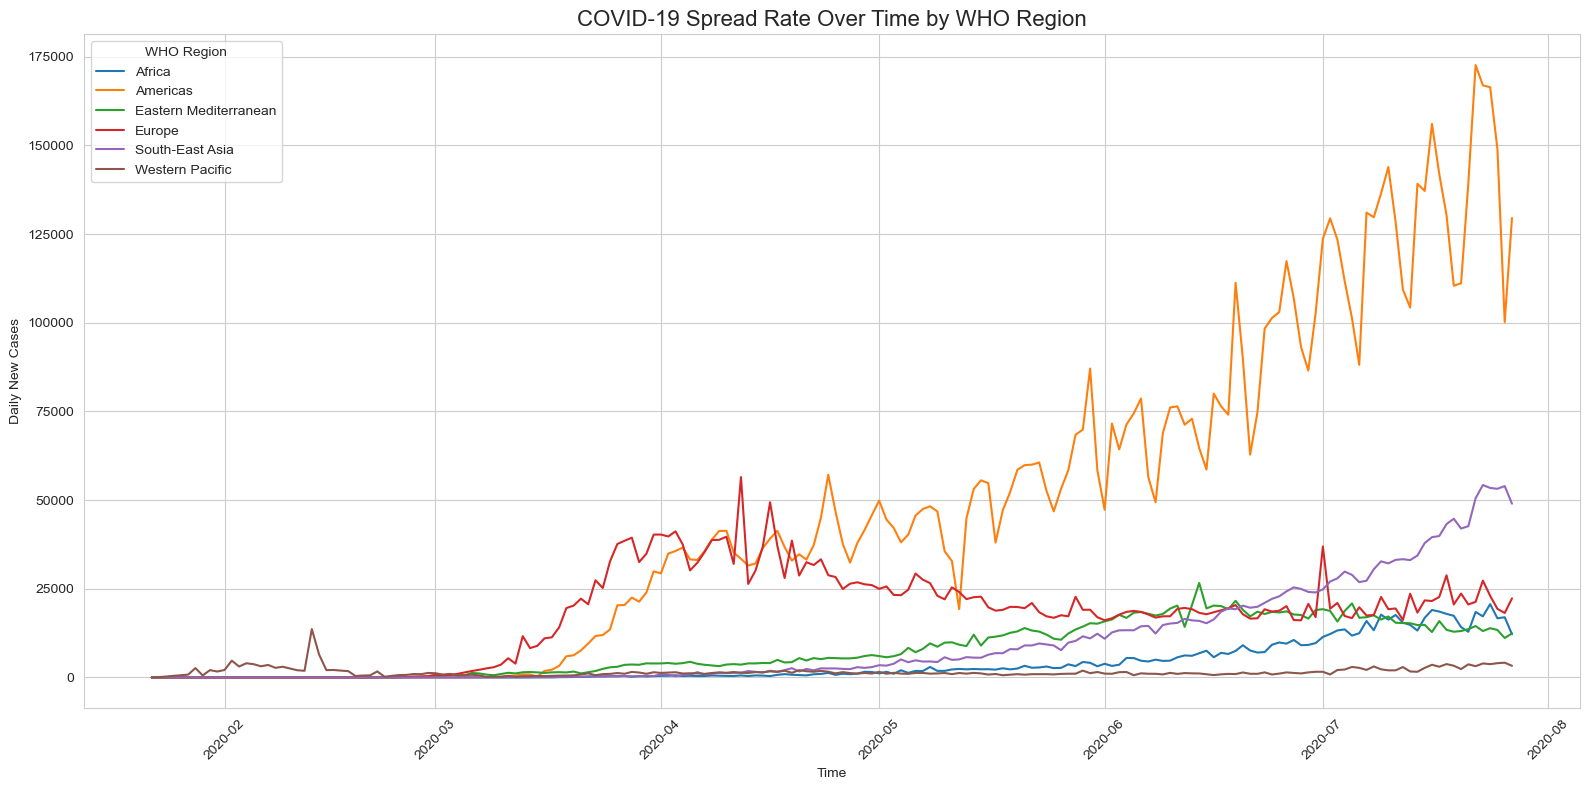

In [225]:
# Analyze COVID-19 spread rate over time by region

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Remove rows missing new_cases or who_region data
df_filtered = df.dropna(subset=['new_cases', 'who_region'])

# Total new cases by date and region
region_daily = df_filtered.groupby(['date', 'who_region'])['new_cases'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(16, 8))
sns.lineplot(data=region_daily, x='date', y='new_cases', hue='who_region')

# Customize the chart
plt.title('COVID-19 Spread Rate Over Time by WHO Region', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Daily New Cases')
plt.xticks(rotation=45)
plt.legend(title='WHO Region')
plt.tight_layout()

plt.show()


🌍 Key Insight: This figure illustrates how the pandemic’s trajectory wasn’t uniform globally. Regional differences may stem from timing of outbreaks, healthcare infrastructure, public health responses, and socio-economic factors influencing containment efforts.

<Figure size 1400x600 with 0 Axes>

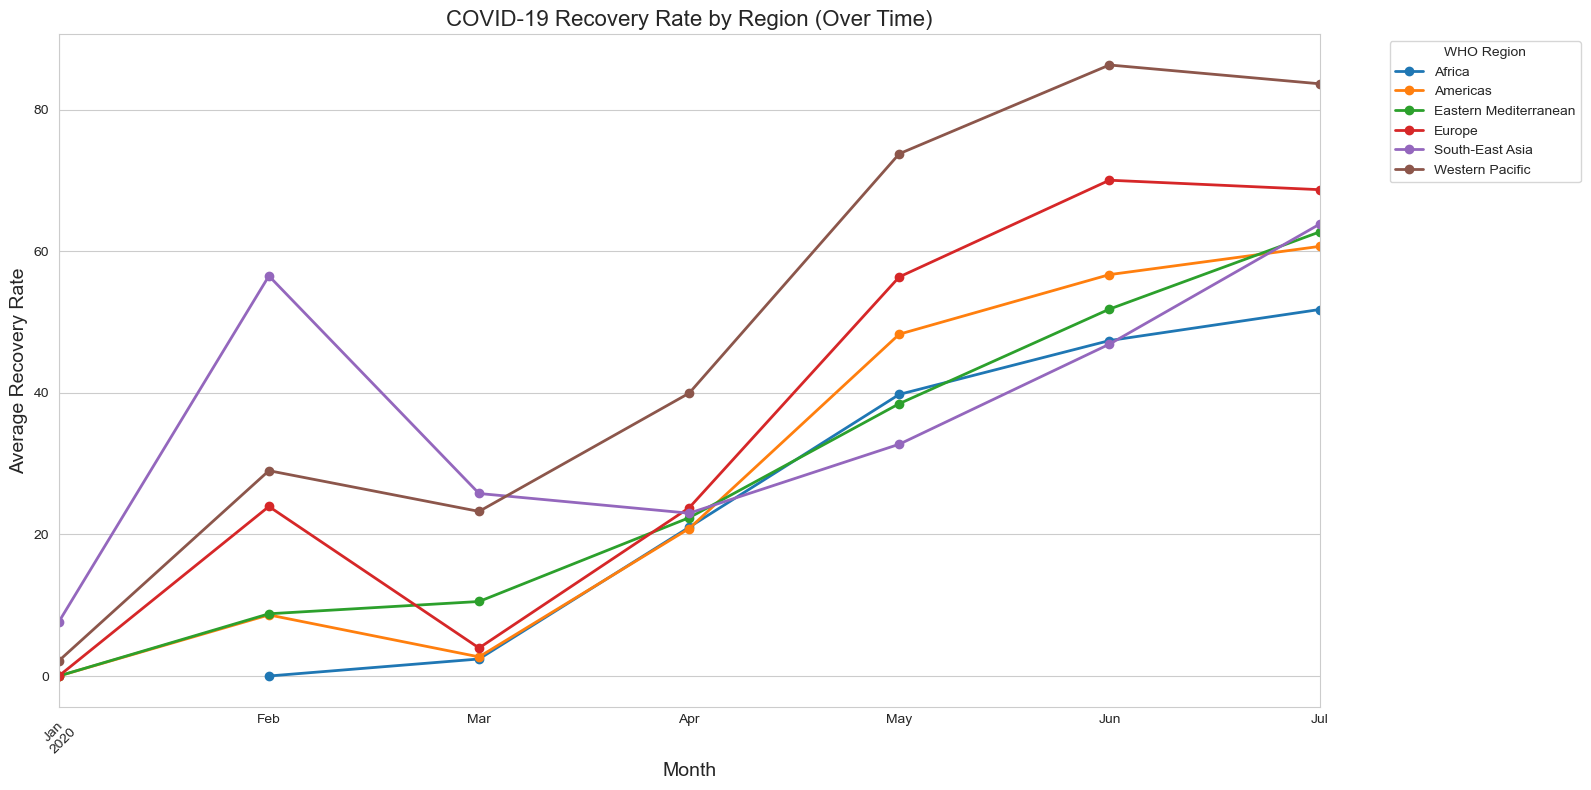

In [226]:
# Analyze COVID-19 recovery rate by region (who_region)
# Step 1: Calculate average recovery rate by month and region

# Calculate average recovery rate by month and region
recovery_by_region = df.groupby(['month_year', 'who_region'])['recovery_rate'].mean().reset_index()

# Pivot for easier charting
recovery_pivot = recovery_by_region.pivot(index='month_year', columns='who_region', values='recovery_rate')

# Step 2: Plot recovery rate trend
plt.figure(figsize=(14, 6))
recovery_pivot.plot(marker='o', figsize=(16, 8), linewidth=2)
plt.title('COVID-19 Recovery Rate by Region (Over Time)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Recovery Rate', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='WHO Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


🟤 Western Pacific maintained the highest recovery rates throughout the period, peaking in May and staying consistently strong—suggesting early control and effective containment.

🟣 South-East Asia saw a dramatic spike in February followed by a sharp drop in March, but steadily recovered, indicating initial volatility with later stabilization.

🔴 Europe showed a gradual and reliable increase starting March, reaching competitive recovery rates by July—potentially reflecting strong public health interventions.

🟠 Americas and 🟢 Eastern Mediterranean both experienced slow but steady improvements, with the Americas slightly ahead overall.

🔵 Africa started low and progressed gradually, but by July, it still ranked lowest among the regions—possibly due to resource limitations or later outbreak timelines.

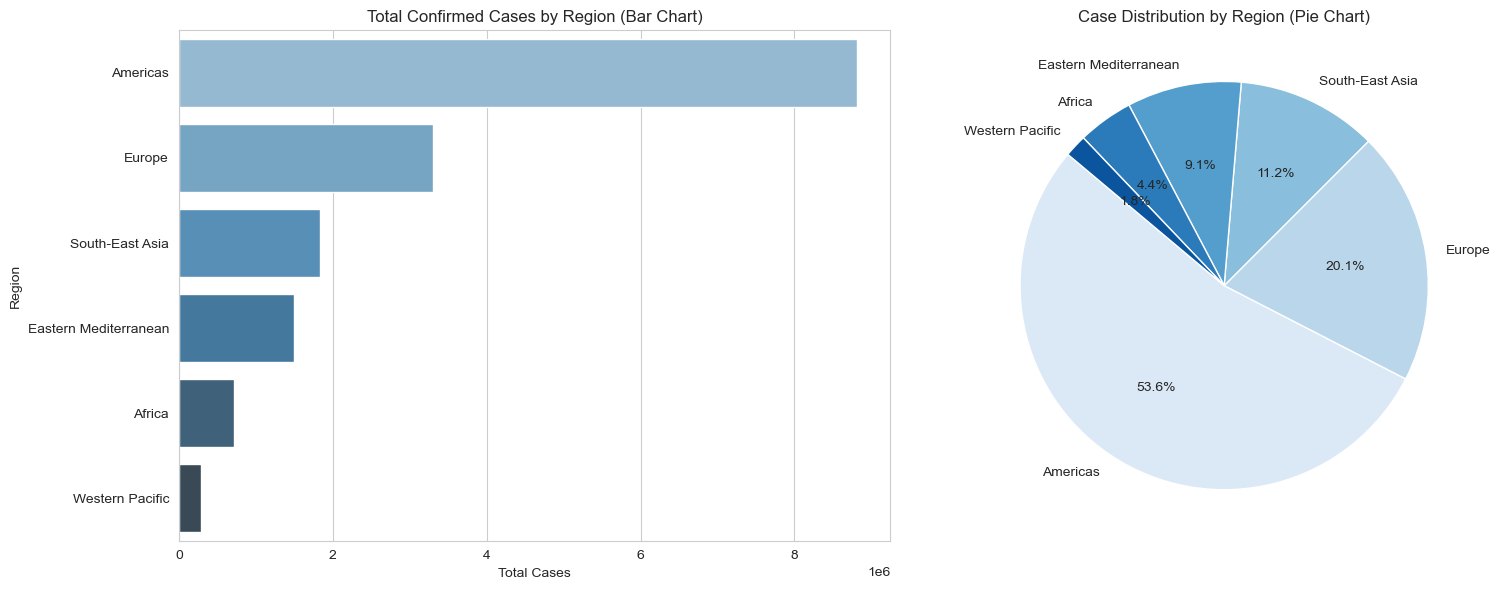

In [227]:
# Total confirmed cases by region

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume df is the original DataFrame and contains columns 'who_region' and 'new_cases'
region_cases = df.groupby('who_region')['new_cases'].sum().sort_values(ascending=False).reset_index()

# Create charts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart: using hue to avoid warnings
sns.barplot(
    data=region_cases,
    x='new_cases',
    y='who_region',
    hue='who_region',
    dodge=False,
    palette='Blues_d',
    ax=axes[0],
    legend=False  # Disable legend if not needed
)
axes[0].set_title('Total Confirmed Cases by Region (Bar Chart)')
axes[0].set_xlabel('Total Cases')
axes[0].set_ylabel('Region')

# Pie chart
axes[1].pie(
    region_cases['new_cases'],
    labels=region_cases['who_region'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Blues", len(region_cases))
)
axes[1].set_title('Case Distribution by Region (Pie Chart)')

plt.tight_layout()
plt.show()


📌 Key Insight: The pandemic’s burden was highly uneven across regions. The Americas faced the most intense outbreak, possibly due to high population density, delayed containment measures, or systemic challenges. Meanwhile, regions like the Western Pacific might reflect successful early interventions or less exposure during this phase.

### More insight

📈 Calculate the daily growth rate of infections

For United Kingdoom

In [245]:
import pandas as pd

# Filter data for United Kingdom
uk_df = df[df['country_region'] == 'United Kingdom'].sort_values('date')

# Calculate daily confirmed case growth rate
uk_df['confirmed_growth_pct'] = uk_df['confirmed'].pct_change() * 100

# Display results
uk_df[['date', 'confirmed', 'confirmed_growth_pct']].tail(10)


,date,confirmed,confirmed_growth_pct
33463,2020-07-18,295632,0.281205
33650,2020-07-19,296358,0.245576
33837,2020-07-20,296944,0.197734
34024,2020-07-21,297389,0.149860
34211,2020-07-22,297952,0.189314
34398,2020-07-23,298731,0.261452
34585,2020-07-24,299500,0.257422
34772,2020-07-25,300270,0.257095
34959,2020-07-26,301020,0.249775
35146,2020-07-27,301708,0.228556


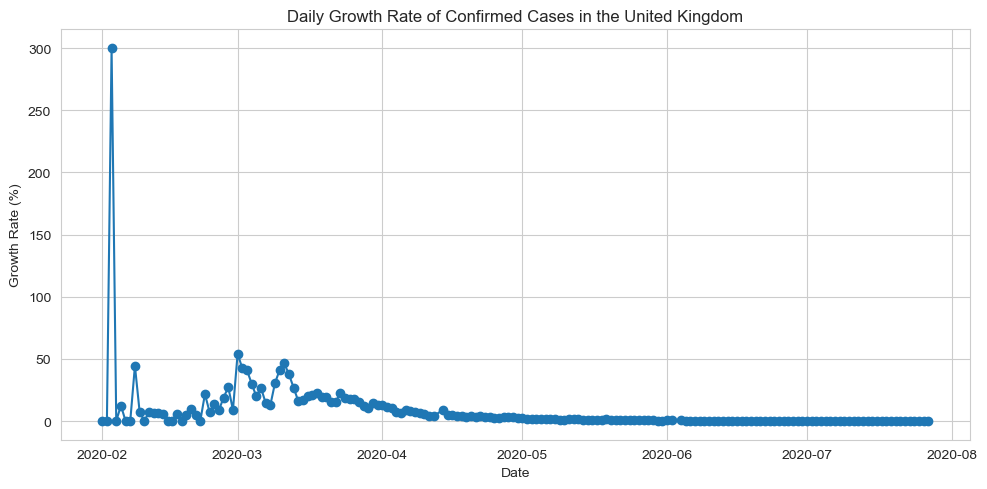

In [247]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(uk_df['date'], uk_df['confirmed_growth_pct'], marker='o', linestyle='-')
plt.title("Daily Growth Rate of Confirmed Cases in the United Kingdom")
plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Key Insights from the Chart

-   Certain data points show significant spikes, which may indicate key events or successful interventions.

-   At the beginning, there was a sudden surge, possibly due to the initial outbreak of the pandemic, which caused significant fluctuations in the numbers.

-   From April 2020 onward, the situation gradually stabilized without sharp increases, reflecting adaptation and gradual improvements in medical conditions.

📊 Analysis of growth rates among countries

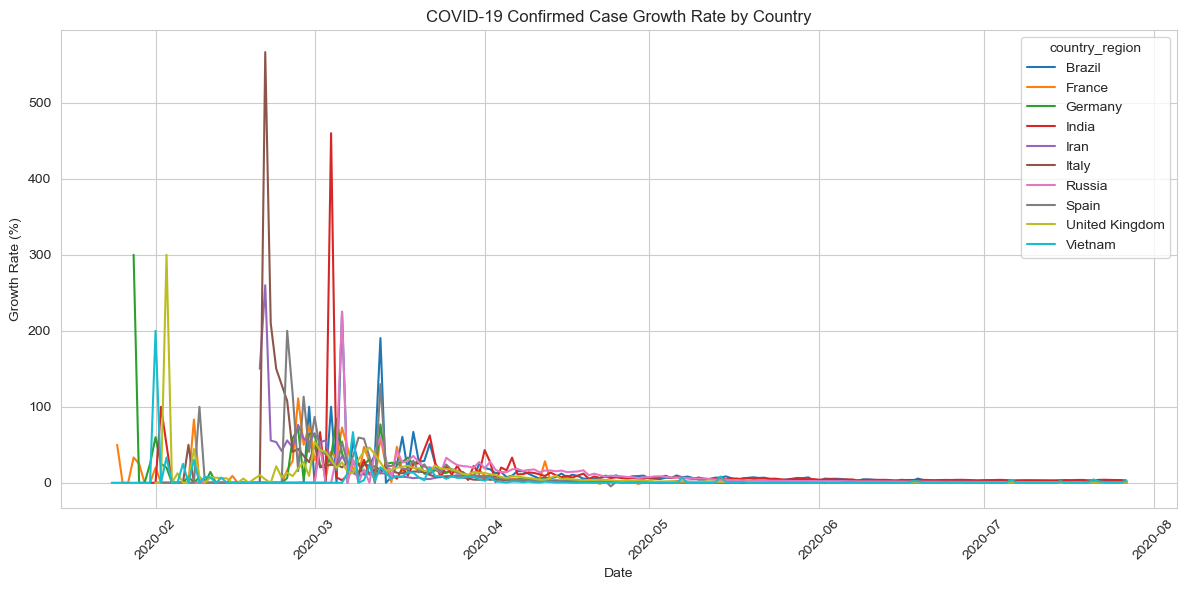

In [249]:
# Sort data by country and date
df = df.sort_values(by=['country_region', 'date'])

# Calculate daily percentage change in confirmed cases for each country
df['growth_pct'] = df.groupby('country_region')['confirmed'].pct_change() * 100

# Select specific countries for comparison
selected_countries = ['United States', 'Brazil','Russia','India', 'Spain', 'Italy', 'United Kingdom','France', 'Germany', 'Iran', 'Vietnam']     
df_filtered = df[df['country_region'].isin(selected_countries)]

# Plot the chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='date', y='growth_pct', hue='country_region')
plt.title("COVID-19 Confirmed Case Growth Rate by Country")
plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


🗓️ Timeline of Key Outbreaks and Trends

In late February 2020, Italy experienced a severe outbreak of the pandemic.

In early March 2020, India saw its own outbreak begin.

Before May 2020, due to the initial surge of infections, the rate of increase was highly volatile. However, from May 2020 onward, the pandemic gradually stabilized and no longer showed sharp increases as seen in the early phase.

⚰️ Rolling Death Rate Analysis (7-Day Moving Average)

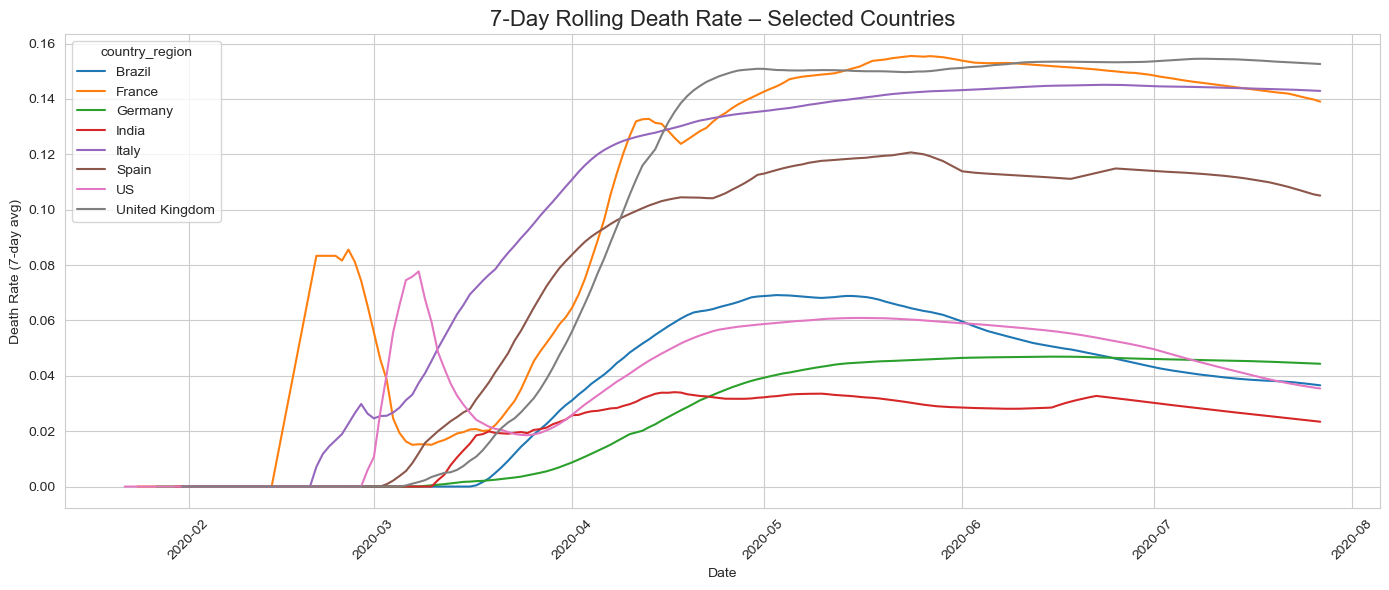

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of countries to analyze
countries = ['US', 'United Kingdom', 'France', 'Italy', 'Germany', 'Spain', 'Brazil', 'India']

# Filter data for selected countries
df_selected = df[df['country_region'].isin(countries)].copy()
df_selected = df_selected.sort_values(['country_region', 'date'])

# Calculate death rate and 7-day rolling average
df_selected['death_rate'] = df_selected['deaths'] / df_selected['confirmed']
df_selected['rolling_death_rate'] = df_selected.groupby('country_region')['death_rate'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Plot comparison chart
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_selected, x='date', y='rolling_death_rate', hue='country_region')
plt.title("7-Day Rolling Death Rate – Selected Countries", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


📊 **Key Observations from the Chart**

-   🇮🇹 Italy, 🇪🇸 Spain, and 🇬🇧 the UK experienced the highest death rates, peaking between March and April 2020.

-   🇺🇸 The US showed a gradual increase, with its peak slightly lower than Italy’s but more prolonged.

-   🇧🇷 Brazil's death rate rose steadily, reaching its peak later—around June 2020.

-   🇫🇷 France, 🇩🇪 Germany, and 🇮🇳 India had lower overall death rates, with Germany maintaining the lowest throughout the period.

-   Across most countries, the death rates declined after peaking, suggesting early containment efforts or healthcare adaptation.

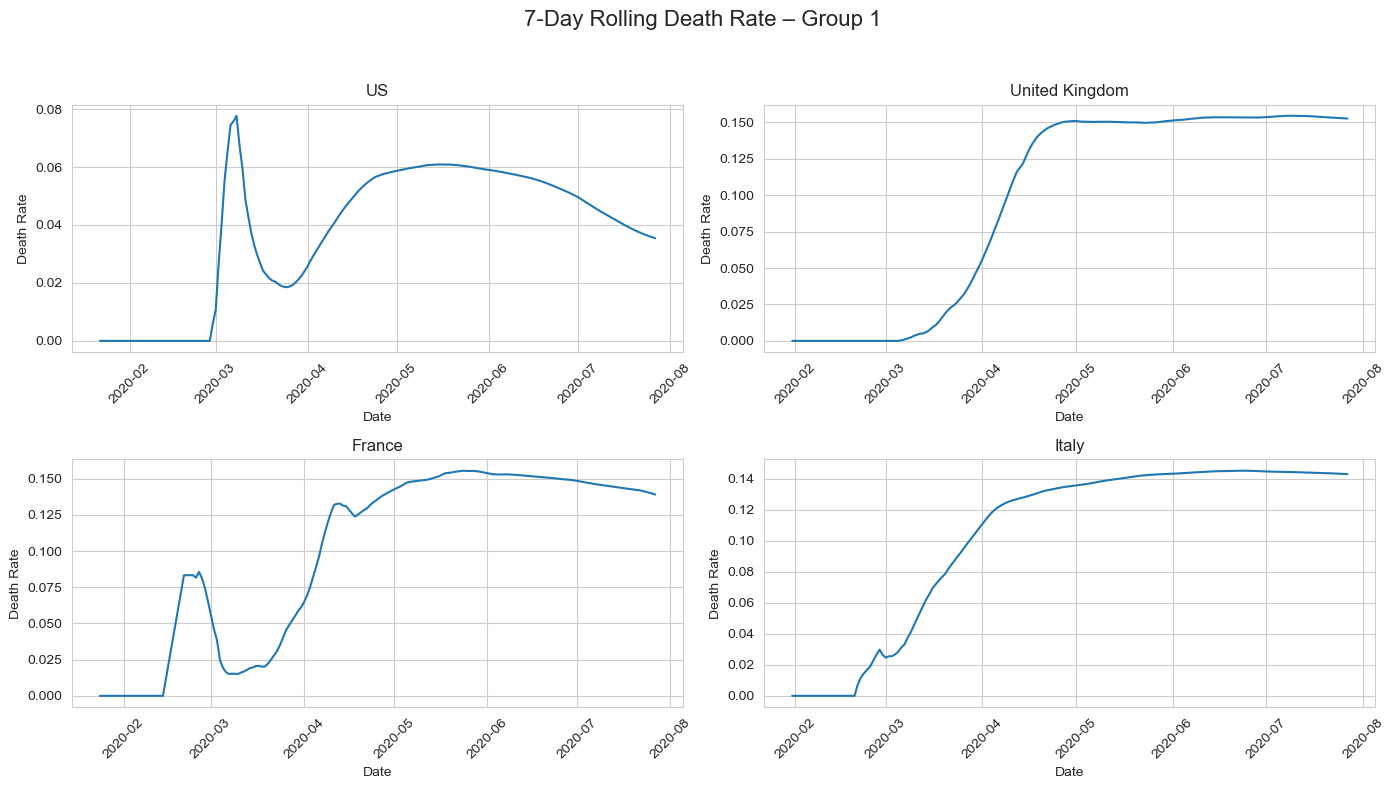

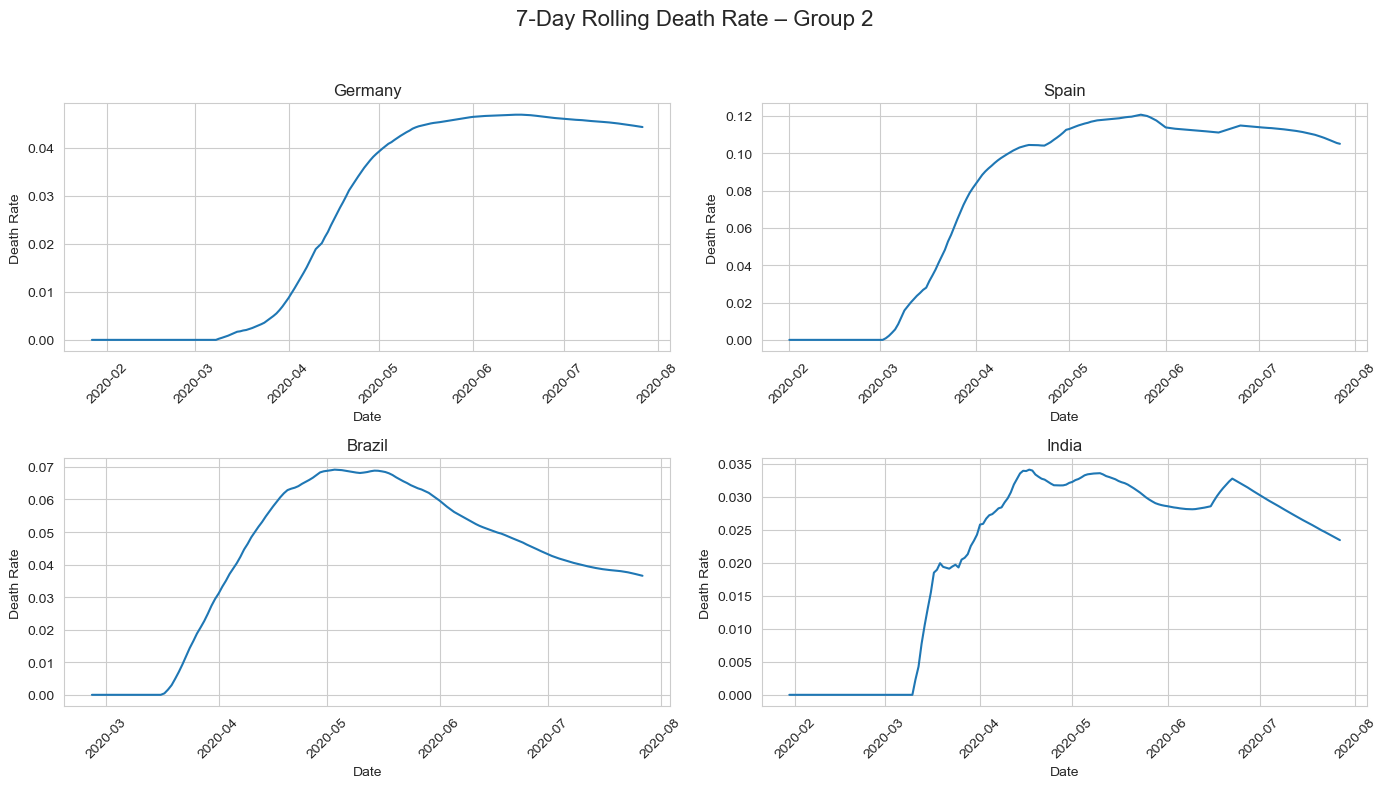

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is already available and the 'date' column has been converted to datetime
# df['date'] = pd.to_datetime(df['date'])

# List of countries to analyze
countries = ['US', 'United Kingdom', 'France', 'Italy', 'Germany', 'Spain', 'Brazil', 'India']

# Filter data
df_selected = df[df['country_region'].isin(countries)].copy()
df_selected = df_selected.sort_values(['country_region', 'date'])

# Calculate death rate and 7-day rolling average
df_selected['death_rate'] = df_selected['deaths'] / df_selected['confirmed']
df_selected['rolling_death_rate'] = df_selected.groupby('country_region')['death_rate'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

# Create 2 country groups (each group contains 4 countries)
groups = [countries[:4], countries[4:]]

# Plot charts for each group
for i, group in enumerate(groups):
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle(f"7-Day Rolling Death Rate – Group {i+1}", fontsize=16)
    
    for ax, country in zip(axes.flat, group):
        data = df_selected[df_selected['country_region'] == country]
        sns.lineplot(data=data, x='date', y='rolling_death_rate', ax=ax)
        ax.set_title(country)
        ax.set_xlabel("Date")
        ax.set_ylabel("Death Rate")
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


📈 **Key Takeaways from the Data**

-   There was a sharp rise in the death rate in certain countries at the onset of the pandemic, especially during March and April 2020.

-   After peaking, most countries showed a gradual decline, suggesting the impact of public health measures and improved medical response.

-   Some regions, like India and Germany, maintained consistently lower death rates, indicating potentially more effective containment or differences in population demographics.

-   Countries such as Brazil and the US displayed later or more extended peaks, hinting at delayed intervention or prolonged viral spread.

-   Overall, the trend reflects an initial shock followed by adaptation and control efforts across different national responses.

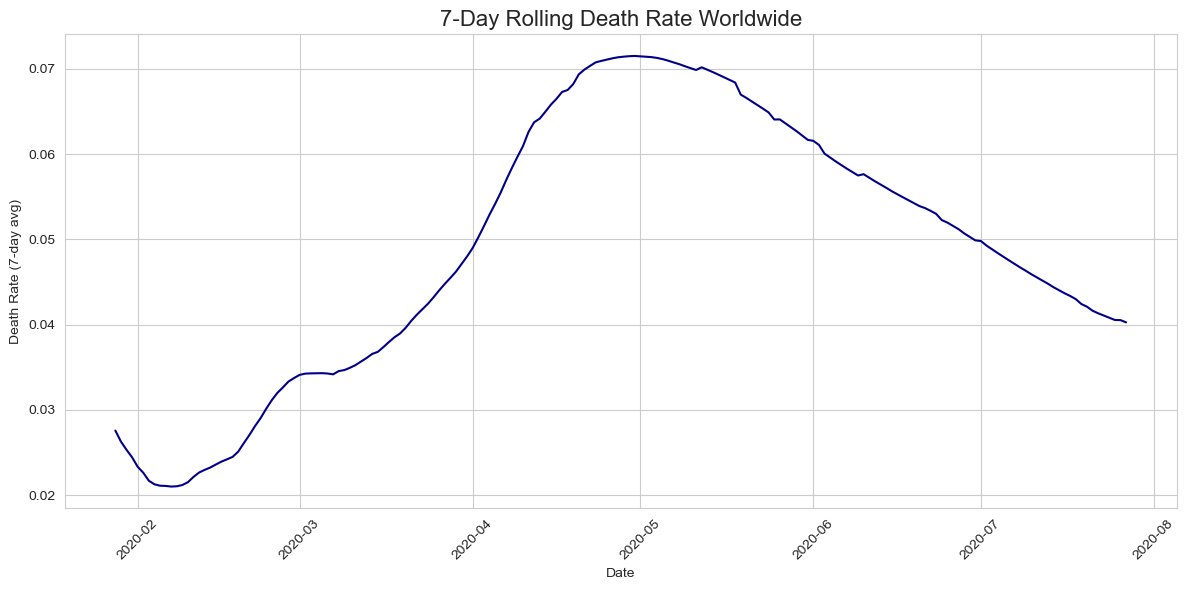

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data globally by date
df_global = df.groupby('date')[['confirmed', 'deaths']].sum().reset_index()

# Calculate death rate and 7-day rolling average
df_global['death_rate'] = df_global['deaths'] / df_global['confirmed']
df_global['rolling_death_rate'] = df_global['death_rate'].rolling(window=7).mean()

# Plot the chart
plt.figure(figsize=(12,6))
sns.lineplot(data=df_global, x='date', y='rolling_death_rate', color='darkblue')
plt.title("7-Day Rolling Death Rate Worldwide", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


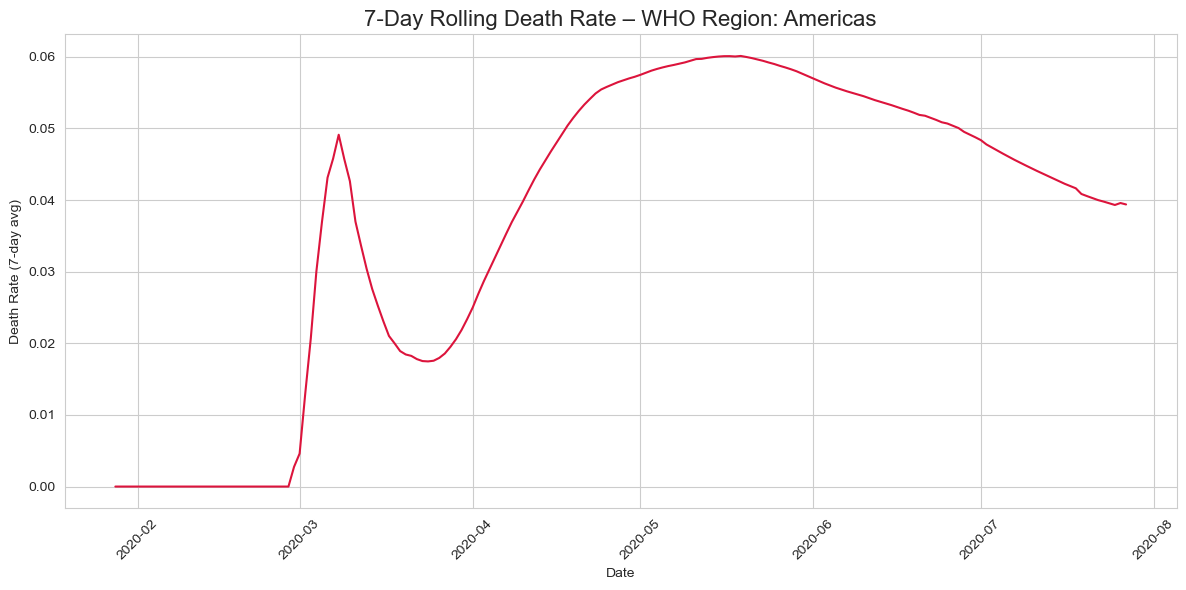

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data where WHO_region is 'Americas'
df_americas = df[df['who_region'] == 'Americas'].copy()
df_americas = df_americas.sort_values('date')

# Calculate total deaths and confirmed cases by day for the entire region
daily = df_americas.groupby('date')[['deaths', 'confirmed']].sum().reset_index()

# Calculate death rate and 7-day rolling average
daily['death_rate'] = daily['deaths'] / daily['confirmed']
daily['rolling_death_rate'] = daily['death_rate'].rolling(window=7).mean()

# Plot the chart
plt.figure(figsize=(12,6))
sns.lineplot(data=daily, x='date', y='rolling_death_rate', color='crimson')
plt.title("7-Day Rolling Death Rate – WHO Region: Americas", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Death Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Key Conclusions

The death rate was minimal at the start of 2020, likely reflecting early stages of the outbreak in the Americas.

A sharp spike occurred in March, reaching a peak around 0.05, coinciding with the initial wave of infections.

After that peak, the rate dropped significantly, but began to rise again toward June, forming a second wave.

From July onward, the trend shows a steady decline, suggesting improved healthcare response or containment efforts.

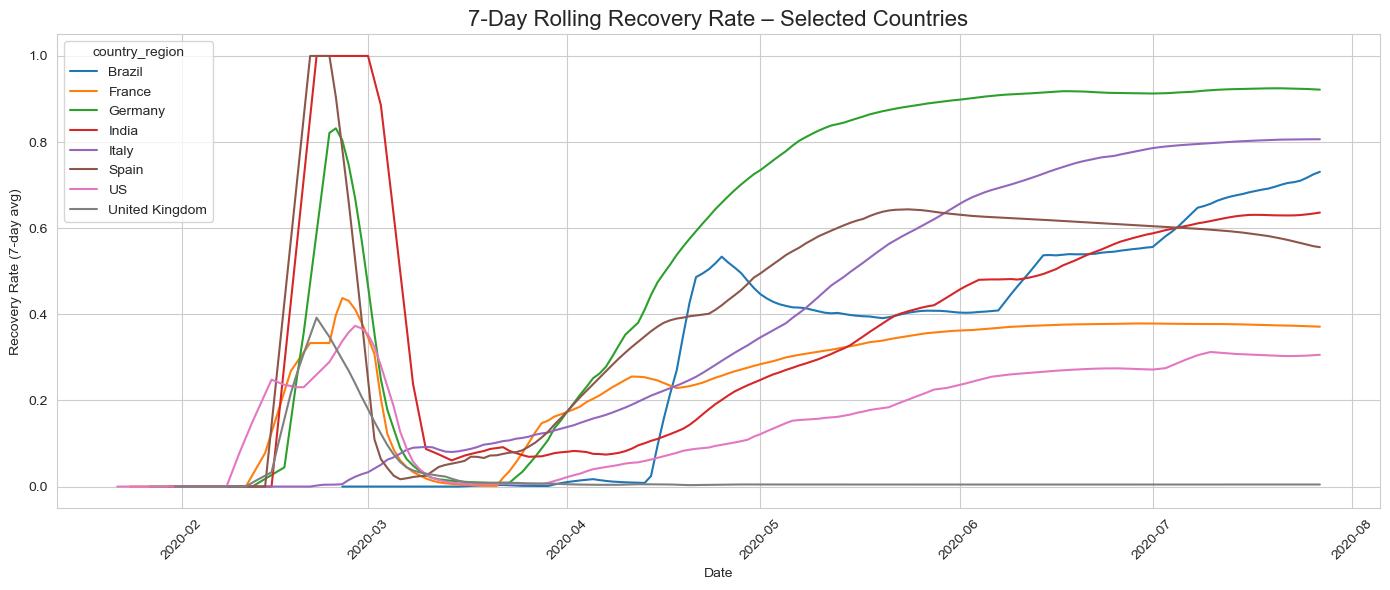

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of countries to analyze
countries = ['US', 'United Kingdom', 'France', 'Italy', 'Germany', 'Spain', 'Brazil', 'India']

# Filter data for the selected countries
df_selected = df[df['country_region'].isin(countries)].copy()
df_selected = df_selected.sort_values(['country_region', 'date'])

# Calculate recovery rate and 7-day rolling average
df_selected['recovery_rate'] = df_selected['recovered'] / df_selected['confirmed']
df_selected['rolling_recovery_rate'] = df_selected.groupby('country_region')['recovery_rate'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Plot comparison chart
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_selected, x='date', y='rolling_recovery_rate', hue='country_region')
plt.title("7-Day Rolling Recovery Rate – Selected Countries", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Recovery Rate (7-day avg)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


🇩🇪 Germany maintained the highest recovery rate overall, with a smooth and consistent upward trend—suggesting an effective and sustained response.

🇮🇳 India showed a strong and steady climb in recovery, reflecting growing containment and treatment measures over time.

🇮🇹 Italy and 🇪🇸 Spain followed similar patterns: initial challenges followed by gradually improving recovery rates.

🇺🇸 USA peaked early but plateaued at a lower level—possibly indicating inconsistencies in case management or regional disparities.

🇧🇷 Brazil experienced noticeable fluctuations, yet the general direction was upward.

🇫🇷 France lagged behind other countries for much of the period shown, but exhibited slow and steady improvement.

🇬🇧 United Kingdom had an early sharp rise but then stabilized with moderate recovery levels.

Correlation between `"Number of infections"` and `"Number of recoveries"`

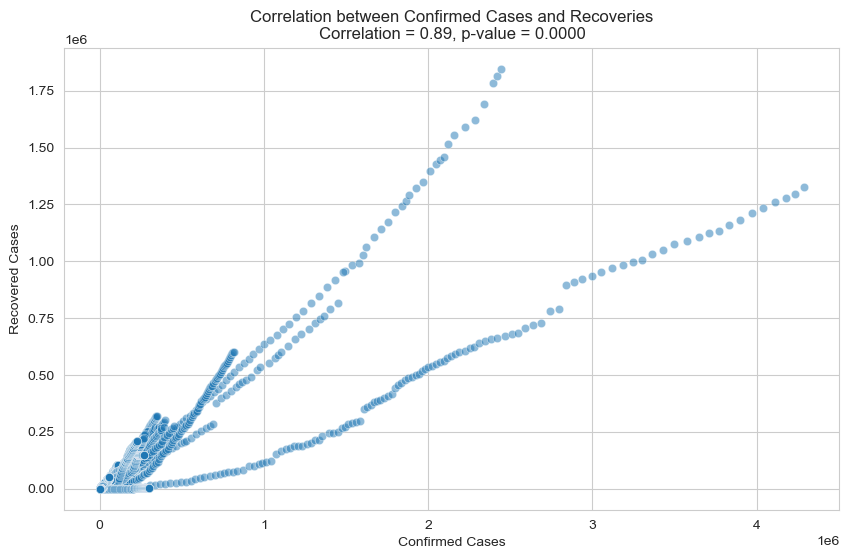

In [255]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient
corr_recovery, p_value = pearsonr(df['confirmed'], df['recovered'])

# Visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confirmed', y='recovered', data=df, alpha=0.5)
plt.title(f'Correlation between Confirmed Cases and Recoveries\nCorrelation = {corr_recovery:.2f}, p-value = {p_value:.4f}')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered Cases')
plt.grid(True)
plt.show()

-   **Correlation coefficient: `0.89`** → indicates a strong positive correlation between confirmed cases and recovered cases. In other words, as the number of confirmed cases increases, the number of recoveries also tends to rise.

-   This suggests the recovery capacity of the healthcare system — in places with a high number of infections, recovery is still effectively maintained.

-   It may also reflect factors such as treatment capability, healthcare policies, or the time lag between infection and recovery.

## 🧾 Overall Conclusion

🌍 This project offers a comprehensive overview of the COVID-19 pandemic during early 2020, analyzed across dimensions such as time, regions, countries, and policy response.

### 🌟 Key Insights

- **Gradual recovery over time**  
  Recovery rates rose steadily each quarter, reflecting improvements in treatment and global healthcare systems.

- **Death rates remained low and stable**  
  Despite surging cases, mortality did not spike proportionally—indicating effective risk control and treatment.

- **Regional disparities**
  - **Americas**: Highest share of infections (~54%) but the lowest recovery rate.
  - **Europe**: Highest fatality rate.
  - **Western Pacific**: Strongest response with highest recovery rate (~71%).

- **Quarterly trends**  
  Infection cases surged in Q2 2020, then slightly declined in Q3—highlighting the impact of social distancing and responsive policies.

- **Positive correlation between infections and recovery**  
  Larger outbreaks correlated with higher recovery counts, suggesting data consistency and healthcare scaling.

---

📌 **Final Takeaway**  
This project goes beyond numbers—it illustrates global resilience, regional contrasts, and rapid adaptability during a crisis. It’s a powerful example of how data analysis can decode complex realities and empower better decisions.
